<p><h3>1. Ler os dados</h3></p>
<span>Ler os dados  no arquivo csv, <b>Real_State_Properati</b></span>

In [796]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
import folium
from folium.plugins import HeatMap

df = pd.read_csv("Real_State_Properati.csv", sep = '\t')
df


,property_type,place_name,country_name,state_name,lat,lon,price,currency,surface_total_in_m2
0,PH,Mataderos,Argentina,Capital Federal,-34.661824,-58.508839,62000.0,USD,55.0
1,apartment,Mataderos,Argentina,Capital Federal,-34.652262,-58.522982,72000.0,USD,55.0
2,apartment,Belgrano,Argentina,Capital Federal,-34.559873,-58.443362,138000.0,USD,45.0
3,apartment,Belgrano,Argentina,Capital Federal,-34.559873,-58.443362,195000.0,USD,65.0
4,PH,Mataderos,Argentina,Capital Federal,-34.652356,-58.501624,239000.0,USD,140.0
...,...,...,...,...,...,...,...,...,...
17218,apartment,Barrio Norte,Argentina,Capital Federal,-34.599214,-58.402519,165000.0,USD,91.0
17219,apartment,Recoleta,Argentina,Capital Federal,-34.587425,-58.397372,165000.0,USD,44.0
17220,apartment,Belgrano,Argentina,Capital Federal,-34.563685,-58.442683,410000.0,USD,157.0
17221,apartment,Belgrano,Argentina,Capital Federal,-34.563685,-58.442683,410000.0,USD,157.0


<p><h3>2. Limpeza de dados</h3></p>
<span>Preparar os dados obtidos da leitura do arquivo csv</span>

<h4>2.1. Substituição de dados</h4>

In [797]:
dfdiffsurfacezerado = df['surface_total_in_m2'] != 0 
df2 = df[dfdiffsurfacezerado]
dfGroup = df2.groupby(['property_type', 'place_name']).mean('surface_total_in_m2')
dfmerge = pd.merge(df, dfGroup, on=['property_type', 'place_name'])
dfmerge = dfmerge.rename(columns={'surface_total_in_m2_y': 'surface_total_in_m2_media'})
dfmerge['surface_total_in_m2_Final'] = np.where(dfmerge['surface_total_in_m2_x']== 0, dfmerge['surface_total_in_m2_media'] , dfmerge['surface_total_in_m2_x'])
dfmerge

,property_type,place_name,country_name,state_name,lat_x,lon_x,price_x,currency,surface_total_in_m2_x,lat_y,lon_y,price_y,surface_total_in_m2_media,surface_total_in_m2_Final
0,PH,Mataderos,Argentina,Capital Federal,-34.661824,-58.508839,62000.0,USD,55.0,-34.653567,-58.501810,119049.180328,100.442623,55.0
1,PH,Mataderos,Argentina,Capital Federal,-34.652356,-58.501624,239000.0,USD,140.0,-34.653567,-58.501810,119049.180328,100.442623,140.0
2,PH,Mataderos,Argentina,Capital Federal,-34.657242,-58.502971,53000.0,USD,28.0,-34.653567,-58.501810,119049.180328,100.442623,28.0
3,PH,Mataderos,Argentina,Capital Federal,-34.650604,-58.496146,245000.0,USD,326.0,-34.653567,-58.501810,119049.180328,100.442623,326.0
4,PH,Mataderos,Argentina,Capital Federal,-34.656920,-58.489784,165000.0,USD,150.0,-34.653567,-58.501810,119049.180328,100.442623,150.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17218,PH,Palermo Viejo,Argentina,Capital Federal,-34.592963,-58.430450,330000.0,USD,143.0,-34.594894,-58.422291,254500.000000,131.500000,143.0
17219,PH,Parque Chas,Argentina,Capital Federal,-34.585679,-58.476317,270000.0,USD,150.0,-34.585679,-58.476317,270000.000000,150.000000,150.0
17220,PH,Palermo Chico,Argentina,Capital Federal,-34.580888,-58.410504,695000.0,USD,348.0,-34.580888,-58.410504,695000.000000,348.000000,348.0
17221,store,Agronomía,Argentina,Capital Federal,-34.588465,-58.485428,420000.0,USD,350.0,-34.588465,-58.485428,420000.000000,350.000000,350.0


In [798]:
dfmerge = dfmerge.drop(columns={'surface_total_in_m2_x','lat_y','lon_y','price_y'})
dfmerge = dfmerge.rename(columns={'lat_x': 'lat'})
dfmerge = dfmerge.rename(columns={'lon_x': 'lon'})
dfmerge = dfmerge.rename(columns={'price_x': 'price'})
dfmerge

,property_type,place_name,country_name,state_name,lat,lon,price,currency,surface_total_in_m2_media,surface_total_in_m2_Final
0,PH,Mataderos,Argentina,Capital Federal,-34.661824,-58.508839,62000.0,USD,100.442623,55.0
1,PH,Mataderos,Argentina,Capital Federal,-34.652356,-58.501624,239000.0,USD,100.442623,140.0
2,PH,Mataderos,Argentina,Capital Federal,-34.657242,-58.502971,53000.0,USD,100.442623,28.0
3,PH,Mataderos,Argentina,Capital Federal,-34.650604,-58.496146,245000.0,USD,100.442623,326.0
4,PH,Mataderos,Argentina,Capital Federal,-34.656920,-58.489784,165000.0,USD,100.442623,150.0
...,...,...,...,...,...,...,...,...,...,...
17218,PH,Palermo Viejo,Argentina,Capital Federal,-34.592963,-58.430450,330000.0,USD,131.500000,143.0
17219,PH,Parque Chas,Argentina,Capital Federal,-34.585679,-58.476317,270000.0,USD,150.000000,150.0
17220,PH,Palermo Chico,Argentina,Capital Federal,-34.580888,-58.410504,695000.0,USD,348.000000,348.0
17221,store,Agronomía,Argentina,Capital Federal,-34.588465,-58.485428,420000.0,USD,350.000000,350.0


<h4>2.2. Conversão de dados</h4>

Adicionando uma coluna <b>price_usd</b> no dataframe, na qual valores que estão em peso argentino seram convertido para dolar americano

In [799]:
dfmerge['price_usd']= dfmerge.apply(lambda x: x.price * 0.0085 if x.currency!='USD' else x.price,axis=1)
dfmerge

,property_type,place_name,country_name,state_name,lat,lon,price,currency,surface_total_in_m2_media,surface_total_in_m2_Final,price_usd
0,PH,Mataderos,Argentina,Capital Federal,-34.661824,-58.508839,62000.0,USD,100.442623,55.0,62000.0
1,PH,Mataderos,Argentina,Capital Federal,-34.652356,-58.501624,239000.0,USD,100.442623,140.0,239000.0
2,PH,Mataderos,Argentina,Capital Federal,-34.657242,-58.502971,53000.0,USD,100.442623,28.0,53000.0
3,PH,Mataderos,Argentina,Capital Federal,-34.650604,-58.496146,245000.0,USD,100.442623,326.0,245000.0
4,PH,Mataderos,Argentina,Capital Federal,-34.656920,-58.489784,165000.0,USD,100.442623,150.0,165000.0
...,...,...,...,...,...,...,...,...,...,...,...
17218,PH,Palermo Viejo,Argentina,Capital Federal,-34.592963,-58.430450,330000.0,USD,131.500000,143.0,330000.0
17219,PH,Parque Chas,Argentina,Capital Federal,-34.585679,-58.476317,270000.0,USD,150.000000,150.0,270000.0
17220,PH,Palermo Chico,Argentina,Capital Federal,-34.580888,-58.410504,695000.0,USD,348.000000,348.0,695000.0
17221,store,Agronomía,Argentina,Capital Federal,-34.588465,-58.485428,420000.0,USD,350.000000,350.0,420000.0


<h4>2.3. Criar informações baseadas nos dados</h4>

In [800]:
dfmerge['preco_metro'] = dfmerge['price_usd'] / dfmerge['surface_total_in_m2_Final']
dfmerge

,property_type,place_name,country_name,state_name,lat,lon,price,currency,surface_total_in_m2_media,surface_total_in_m2_Final,price_usd,preco_metro
0,PH,Mataderos,Argentina,Capital Federal,-34.661824,-58.508839,62000.0,USD,100.442623,55.0,62000.0,1127.272727
1,PH,Mataderos,Argentina,Capital Federal,-34.652356,-58.501624,239000.0,USD,100.442623,140.0,239000.0,1707.142857
2,PH,Mataderos,Argentina,Capital Federal,-34.657242,-58.502971,53000.0,USD,100.442623,28.0,53000.0,1892.857143
3,PH,Mataderos,Argentina,Capital Federal,-34.650604,-58.496146,245000.0,USD,100.442623,326.0,245000.0,751.533742
4,PH,Mataderos,Argentina,Capital Federal,-34.656920,-58.489784,165000.0,USD,100.442623,150.0,165000.0,1100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
17218,PH,Palermo Viejo,Argentina,Capital Federal,-34.592963,-58.430450,330000.0,USD,131.500000,143.0,330000.0,2307.692308
17219,PH,Parque Chas,Argentina,Capital Federal,-34.585679,-58.476317,270000.0,USD,150.000000,150.0,270000.0,1800.000000
17220,PH,Palermo Chico,Argentina,Capital Federal,-34.580888,-58.410504,695000.0,USD,348.000000,348.0,695000.0,1997.126437
17221,store,Agronomía,Argentina,Capital Federal,-34.588465,-58.485428,420000.0,USD,350.000000,350.0,420000.0,1200.000000


In [801]:
############################## outlier MUITO ALTO
indexNames = dfmerge[ dfmerge['preco_metro'] > 206332 ].index
dfmerge.drop(indexNames , inplace=True)

<p><h3>3. Analisando os dados</h3></p>
<span>Demonstrar através de gráficos as informações obtidas dos dados do arquivo csv</span>

<h4>3.1. Preço do metro quadrado por bairro</h4>

In [802]:

medias_bairro = dfmerge.groupby(['place_name'])['preco_metro'].agg(['max','min','mean','median'])
medias_bairro

,max,min,mean,median
place_name,,,,
Abasto,2857.142857,914.893617,1998.555785,2009.132420
Agronomía,2638.297872,860.323887,2088.124134,2187.500000
Almagro,24387.804878,70.512821,2541.883604,2121.212121
Balvanera,13066.666667,467.796610,1964.499761,1850.925926
Barracas,29562.500000,318.750000,1990.802533,1827.956989
...,...,...,...,...
Villa Riachuelo,1333.333333,769.230769,1110.690766,1229.508197
Villa Santa Rita,2403.846154,1161.417323,1880.717836,2020.625889
Villa Soldati,1720.000000,13.797467,743.666758,775.688994


<h5>3.1.1. Media do preço do metro quadrado por bairro</h5>

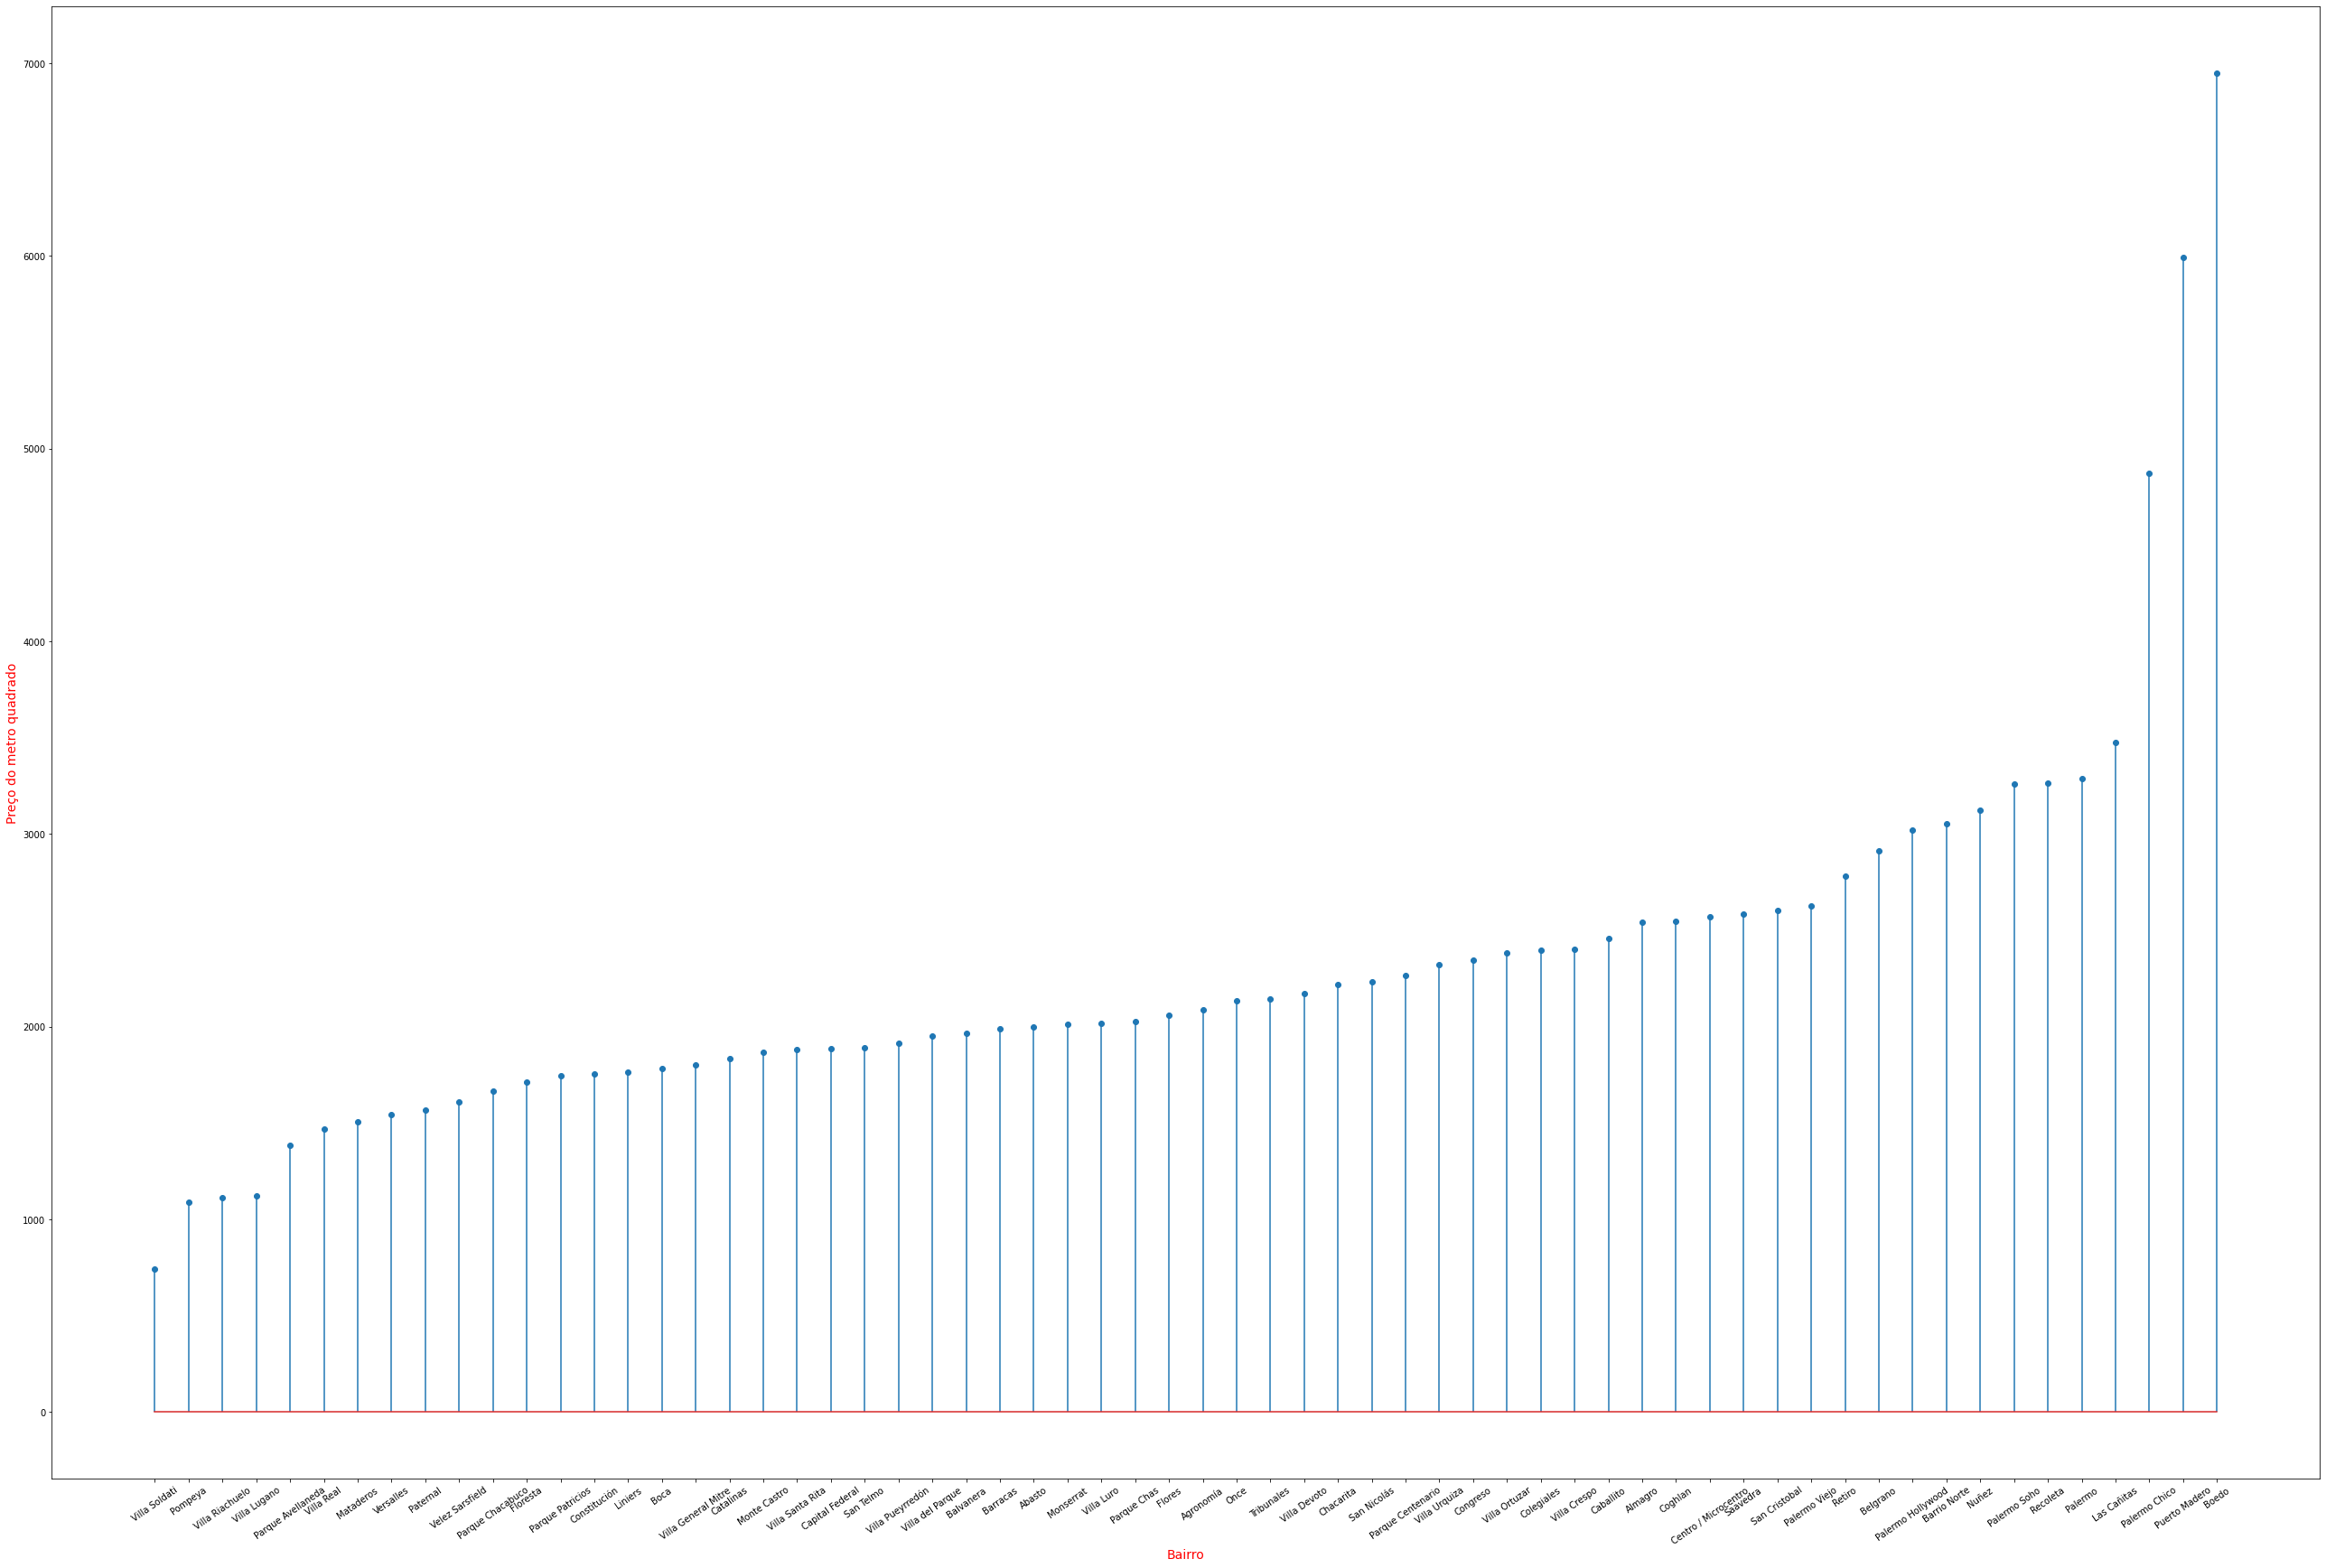

In [803]:
medias_bairro = medias_bairro.sort_values(by=['mean'], ascending=True)
plt.figure(figsize = (45, 30))
plt.xlabel('Bairro', fontsize=14, color='red')
plt.ylabel('Preço do metro quadrado', fontsize=14, color='red')
plt.stem(medias_bairro.index, medias_bairro['mean'])
plt.xticks(rotation = 35)
plt.show()

<h5>3.1.2. Máximo do preço do metro quadrado por bairro</h5>

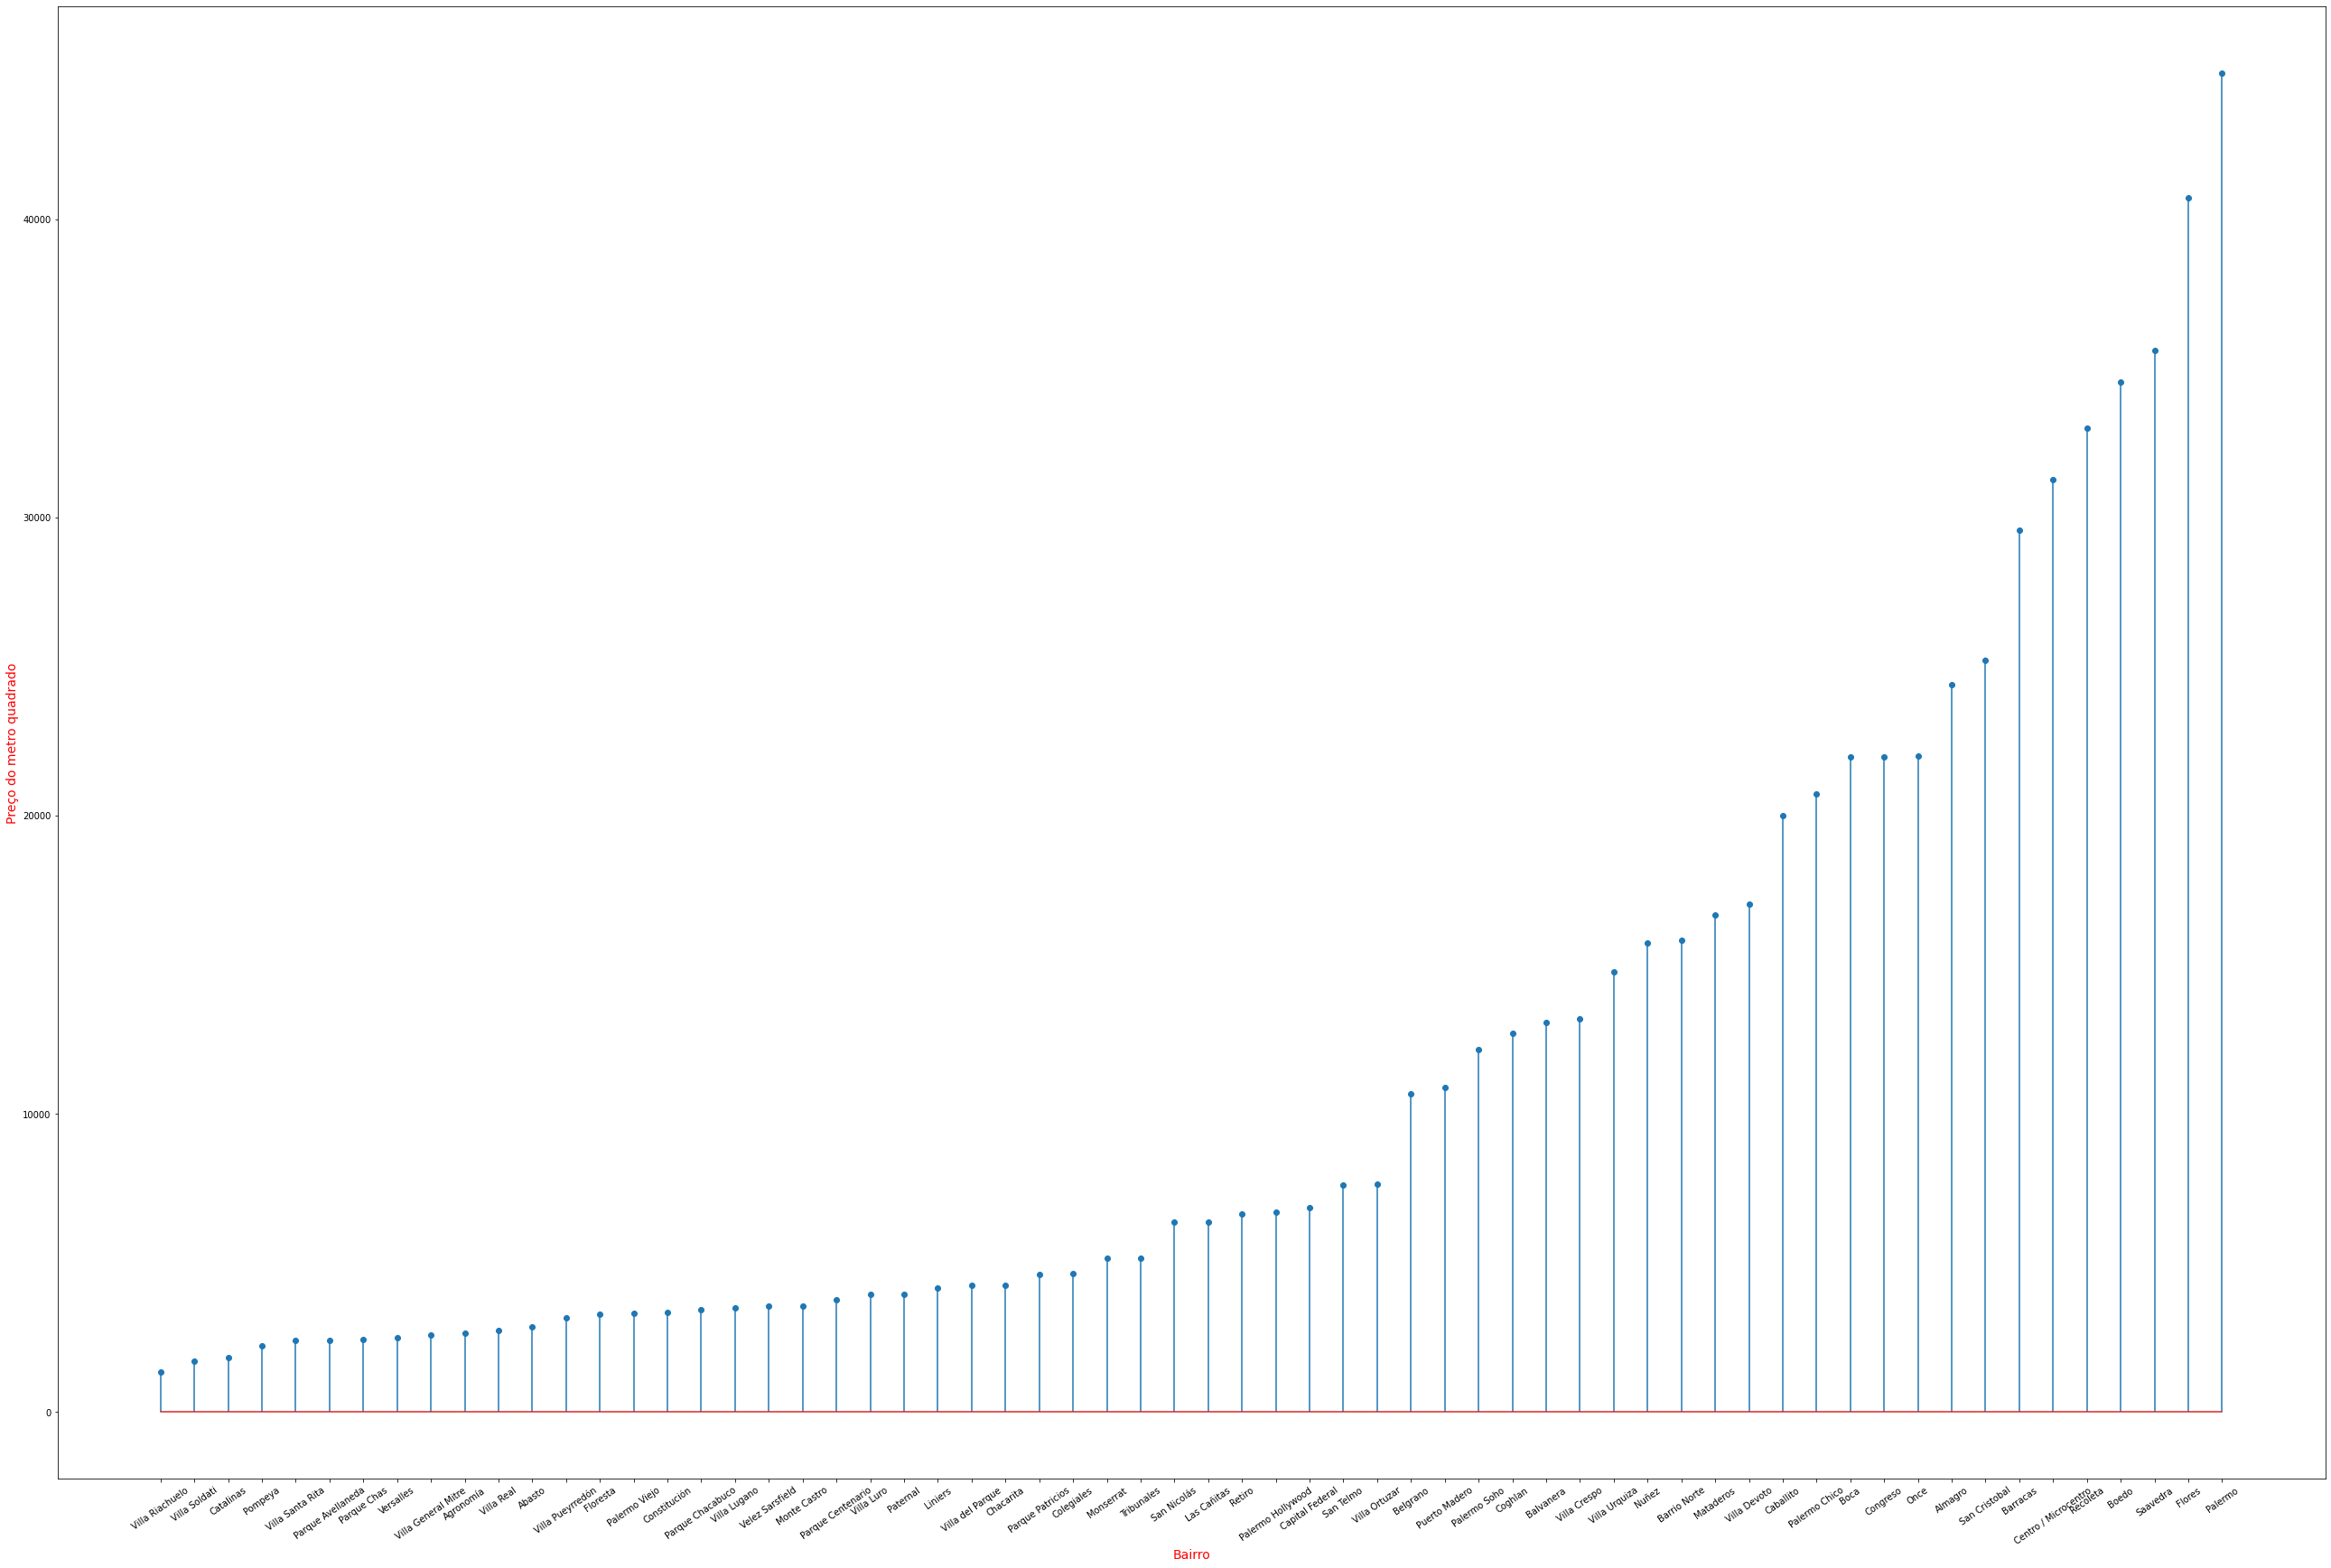

In [804]:
medias_bairro = medias_bairro.sort_values(by=['max'], ascending=True)
plt.figure(figsize = (45, 30))
plt.xlabel('Bairro', fontsize=14, color='red')
plt.ylabel('Preço do metro quadrado', fontsize=14, color='red')
plt.stem(medias_bairro.index, medias_bairro['max'])
plt.xticks(rotation = 35)
plt.show()

<h5>3.1.3. Mínimo do preço do metro quadrado por bairro</h5>

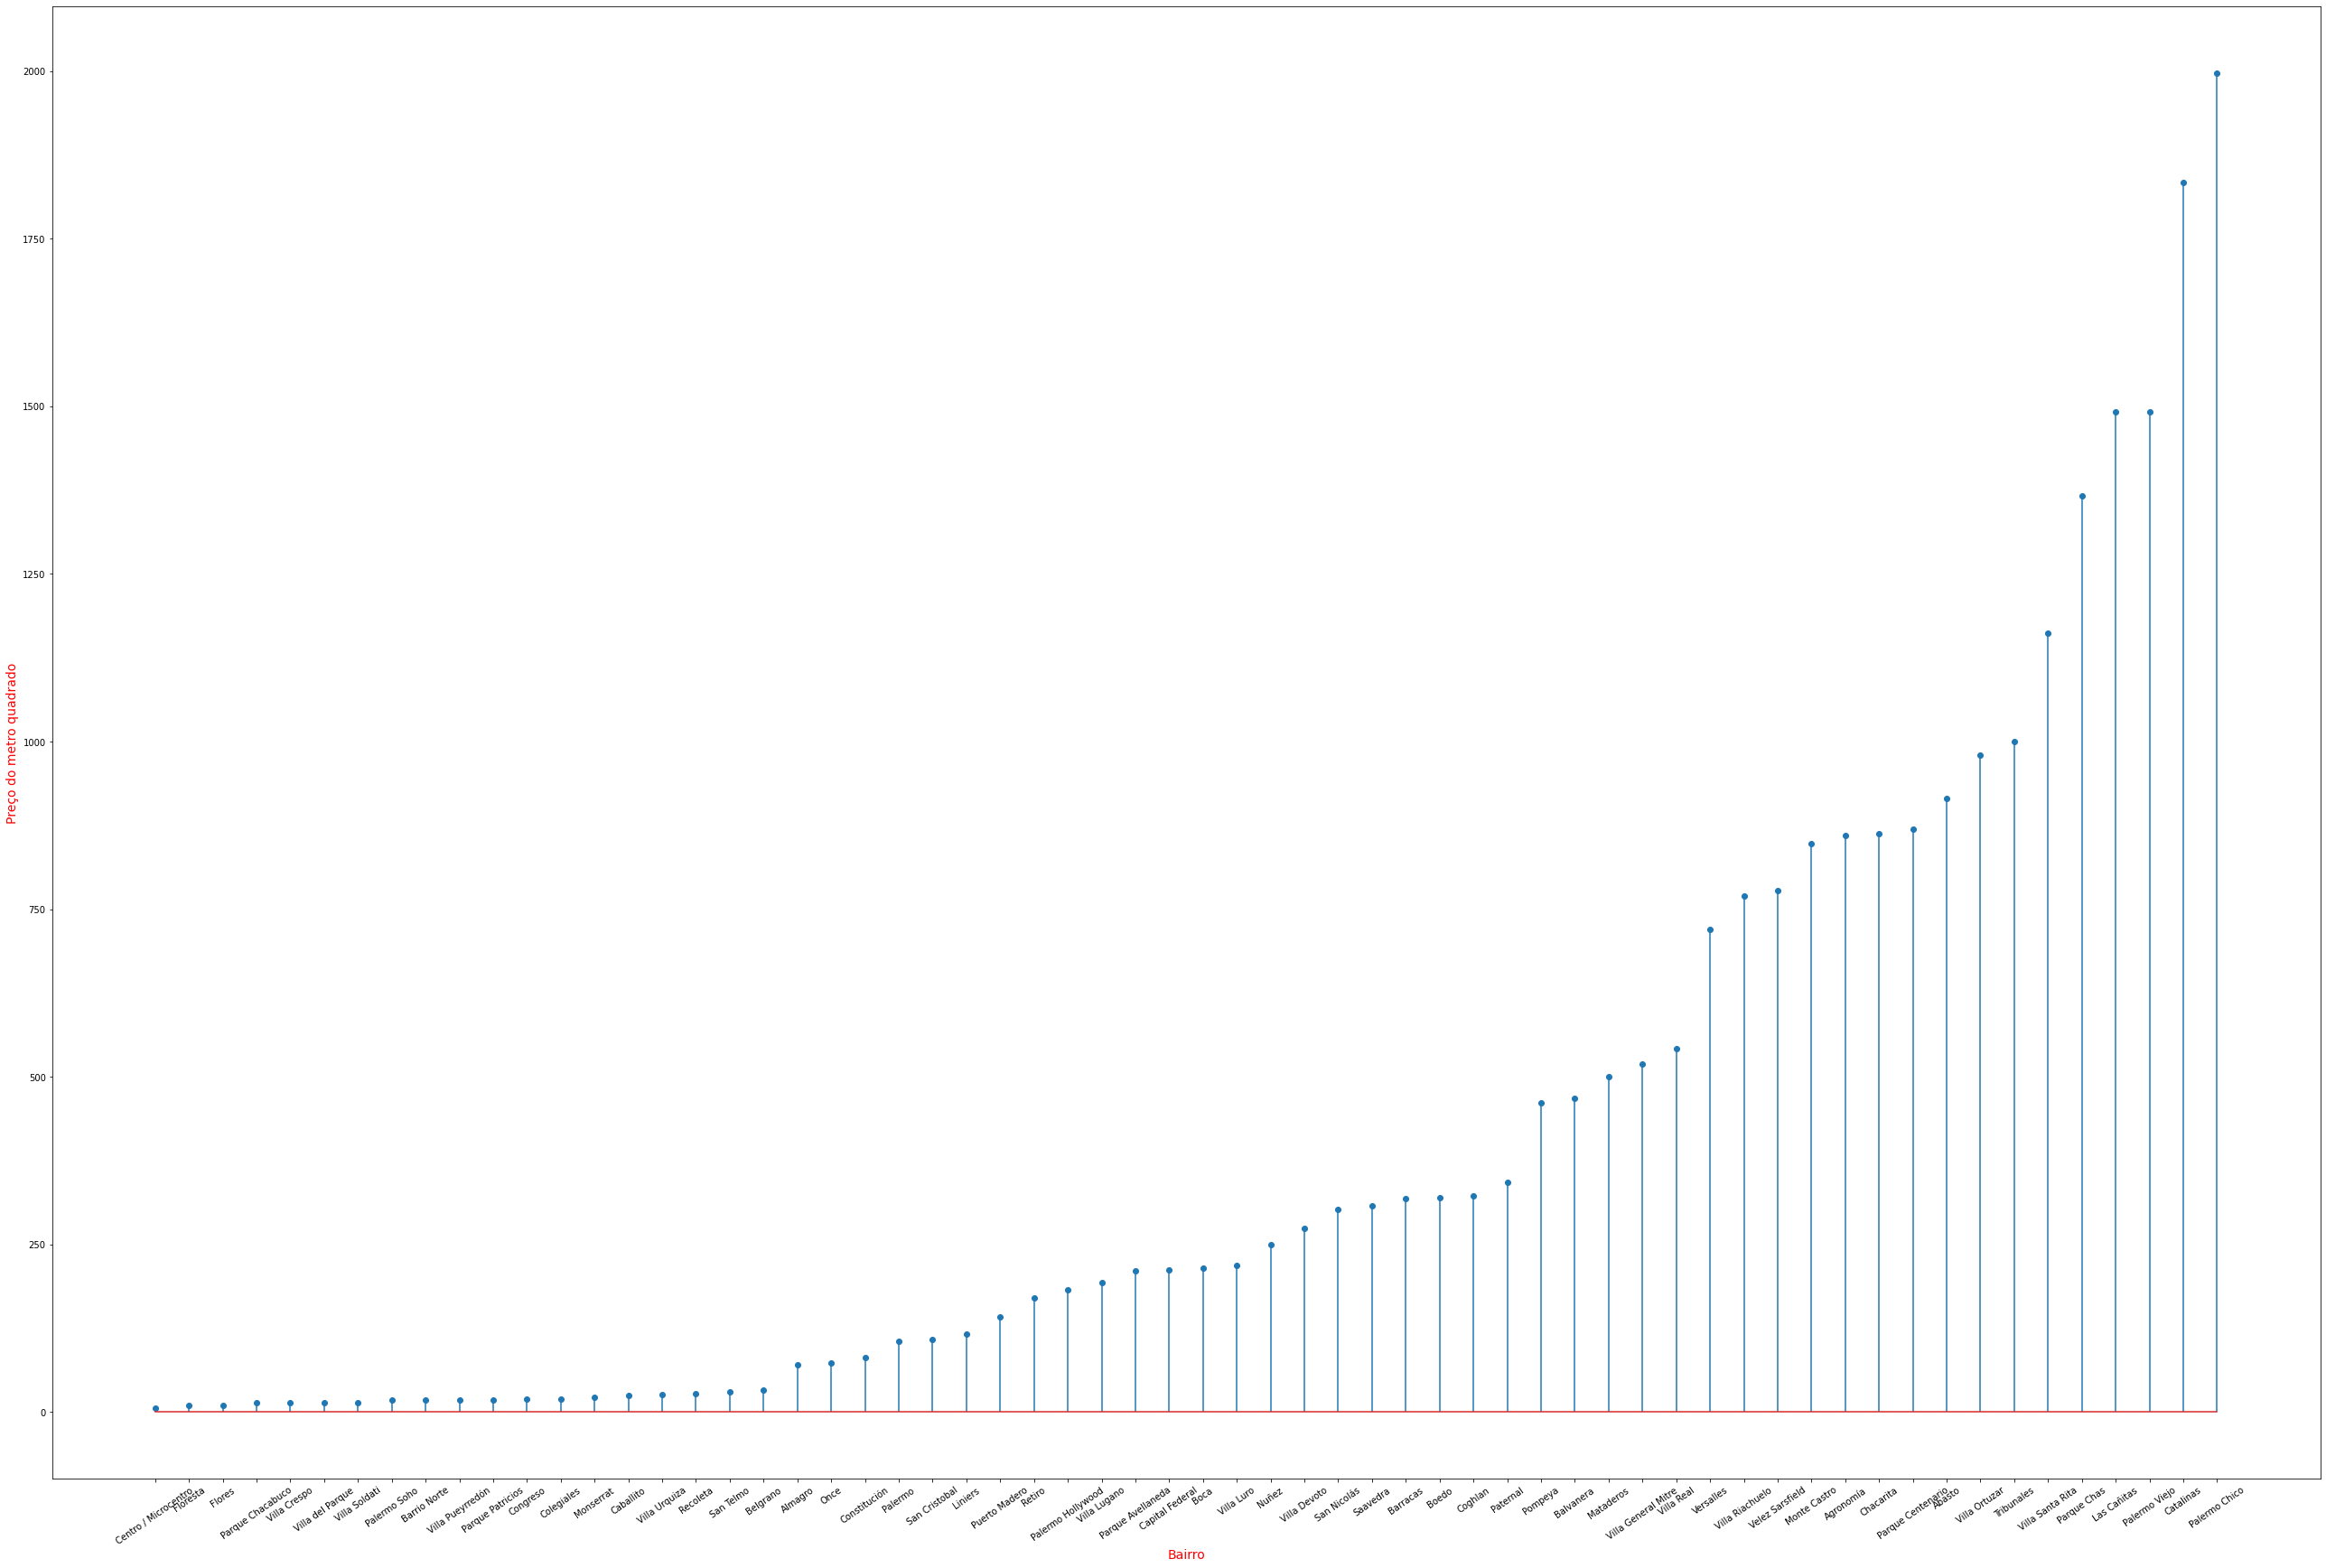

In [805]:
medias_bairro = medias_bairro.sort_values(by=['min'], ascending=True)
plt.figure(figsize = (45, 30))
plt.xlabel('Bairro', fontsize=14, color='red')
plt.ylabel('Preço do metro quadrado', fontsize=14, color='red')
plt.stem(medias_bairro.index, medias_bairro['min'])
plt.xticks(rotation = 35)
plt.show()

<h4>3.2. Preço do metro quadrado por tipo</h4>

In [806]:
medias_tipos = dfmerge.groupby(['property_type'])['preco_metro'].agg(['max','min','mean','median'])
medias_tipos

,max,min,mean,median
property_type,,,,
PH,25000.000000,18.333333,1695.710007,1625.000000
apartment,44900.000000,10.493827,2796.213417,2458.333333
house,23064.516129,214.592275,1716.153891,1451.163795
store,22000.000000,6.054795,2794.256221,2258.064516


<h5>3.2.1. Media do preço do metro quadrado por tipo</h5>

<BarContainer object of 4 artists>

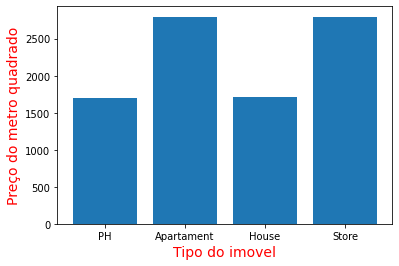

In [807]:
array = dfmerge.to_numpy()

PH = []
apartment = []
house = []
store = []

for i in range(len(array.T[0])):
    if array.T[0][i] == 'PH':
        PH.append(array.T[11][i])
    if array.T[0][i] == 'apartment':
        apartment.append(array.T[11][i])
    if array.T[0][i] == 'house':
        house.append(array.T[11][i])
    if array.T[0][i] == 'store':
        store.append(array.T[11][i])

media_PH = np.mean(PH)
media_ap = np.mean(apartment)
media_houseH = np.mean(house)
media_store = np.mean(store)

x = ['PH', 'Apartament', 'House', 'Store']

y = [media_PH, media_ap, media_houseH, media_store]


plt.xlabel('Tipo do imovel', fontsize=14, color='red')
plt.ylabel('Preço do metro quadrado', fontsize=14, color='red')

plt.bar (x, y)

<h5>3.2.2. Máximo do preço do metro quadrado por tipo</h5>

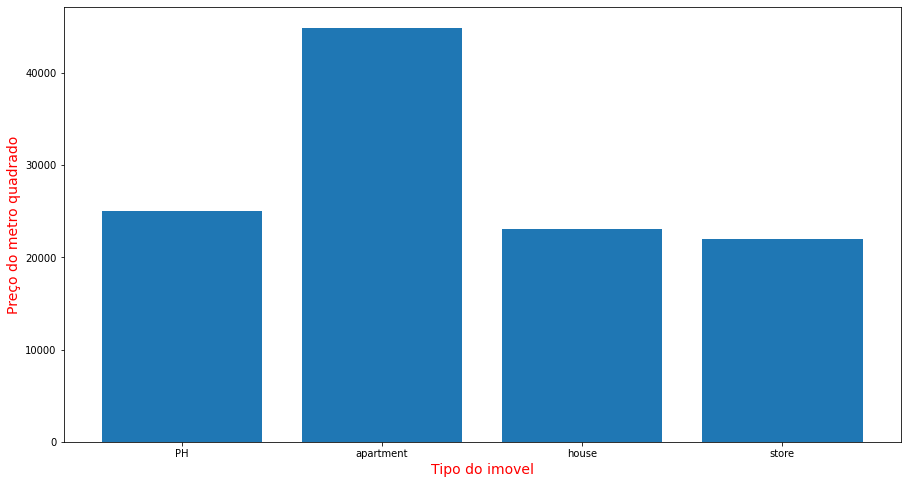

In [808]:
plt.figure(figsize = (15, 8))
plt.xlabel('Tipo do imovel', fontsize=14, color='red')
plt.ylabel('Preço do metro quadrado', fontsize=14, color='red')
plt.bar(medias_tipos.index, medias_tipos['max'])
plt.show()

<h5>3.2.3. Mínimo do preço do metro quadrado por tipo</h5>

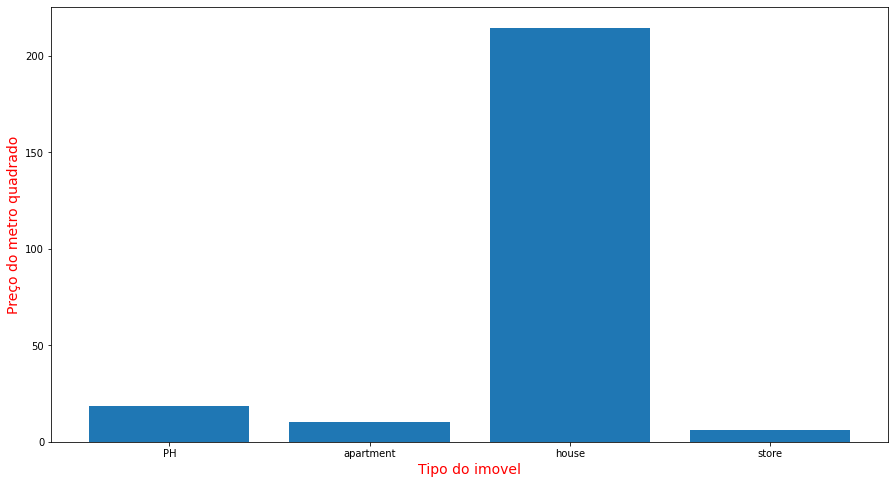

In [809]:
plt.figure(figsize = (15, 8))
plt.xlabel('Tipo do imovel', fontsize=14, color='red')
plt.ylabel('Preço do metro quadrado', fontsize=14, color='red')
plt.bar(medias_tipos.index, medias_tipos['min'])
plt.show()

<h4>3.3. Preço do metro quadrado por bairro e tipo</h4>

In [810]:
medias_bairro_tipos = dfmerge.groupby(['property_type','place_name'])['preco_metro'].agg(['max','min','mean','median'])
medias_bairro_tipos

max          min         mean  \
property_type place_name                                                
PH            Abasto            2400.000000   914.893617  1555.190277   
              Agronomía         2000.000000  1324.324324  1566.441441   
              Almagro           2738.095238   467.796610  1718.147054   
              Balvanera         1923.076923   467.796610  1382.313309   
              Barracas          2132.352941   590.219224  1245.198564   
...                                     ...          ...          ...   
store         Villa Ortuzar     2133.333333   979.381443  1561.804425   
              Villa Real        1346.153846  1346.153846  1346.153846   
              Villa Soldati      775.688994    13.797467   394.743231   
              Villa Urquiza     3687.943262  1045.454545  2354.089922   
              Villa del Parque  3289.473684    13.786585  1524.622315   

                                     median  
property_type place_name                     
PH            Abasto            1434.230769  
              Agronomía         1375.000000  
              Almagro           1677.272727  
              Balvanera         1350.147411  
              Barracas          1147.540984  
...                                     ...  
store         Villa Ortuzar     1567.251462  
              Villa Real        1346.153846  
              Villa Soldati      394.743231  
              Villa Urquiza     2198.797088  
              Villa del Parque  1400.000000  

[229 rows x 4 columns]

In [811]:
medias_bairro_tipos_final = medias_bairro_tipos.reset_index([ 'property_type','place_name' ])
medias_bairro_tipos_final['place_name_type'] = medias_bairro_tipos_final[['property_type', 'place_name']].apply(' '.join, axis=1)
medias_bairro_tipos_final

,property_type,place_name,max,min,mean,median,place_name_type
0,PH,Abasto,2400.000000,914.893617,1555.190277,1434.230769,PH Abasto
1,PH,Agronomía,2000.000000,1324.324324,1566.441441,1375.000000,PH Agronomía
2,PH,Almagro,2738.095238,467.796610,1718.147054,1677.272727,PH Almagro
3,PH,Balvanera,1923.076923,467.796610,1382.313309,1350.147411,PH Balvanera
4,PH,Barracas,2132.352941,590.219224,1245.198564,1147.540984,PH Barracas
...,...,...,...,...,...,...,...
224,store,Villa Ortuzar,2133.333333,979.381443,1561.804425,1567.251462,store Villa Ortuzar
225,store,Villa Real,1346.153846,1346.153846,1346.153846,1346.153846,store Villa Real
226,store,Villa Soldati,775.688994,13.797467,394.743231,394.743231,store Villa Soldati
227,store,Villa Urquiza,3687.943262,1045.454545,2354.089922,2198.797088,store Villa Urquiza


<h5>3.3.1. Media do preço do metro quadrado por bairro e tipo</h5>

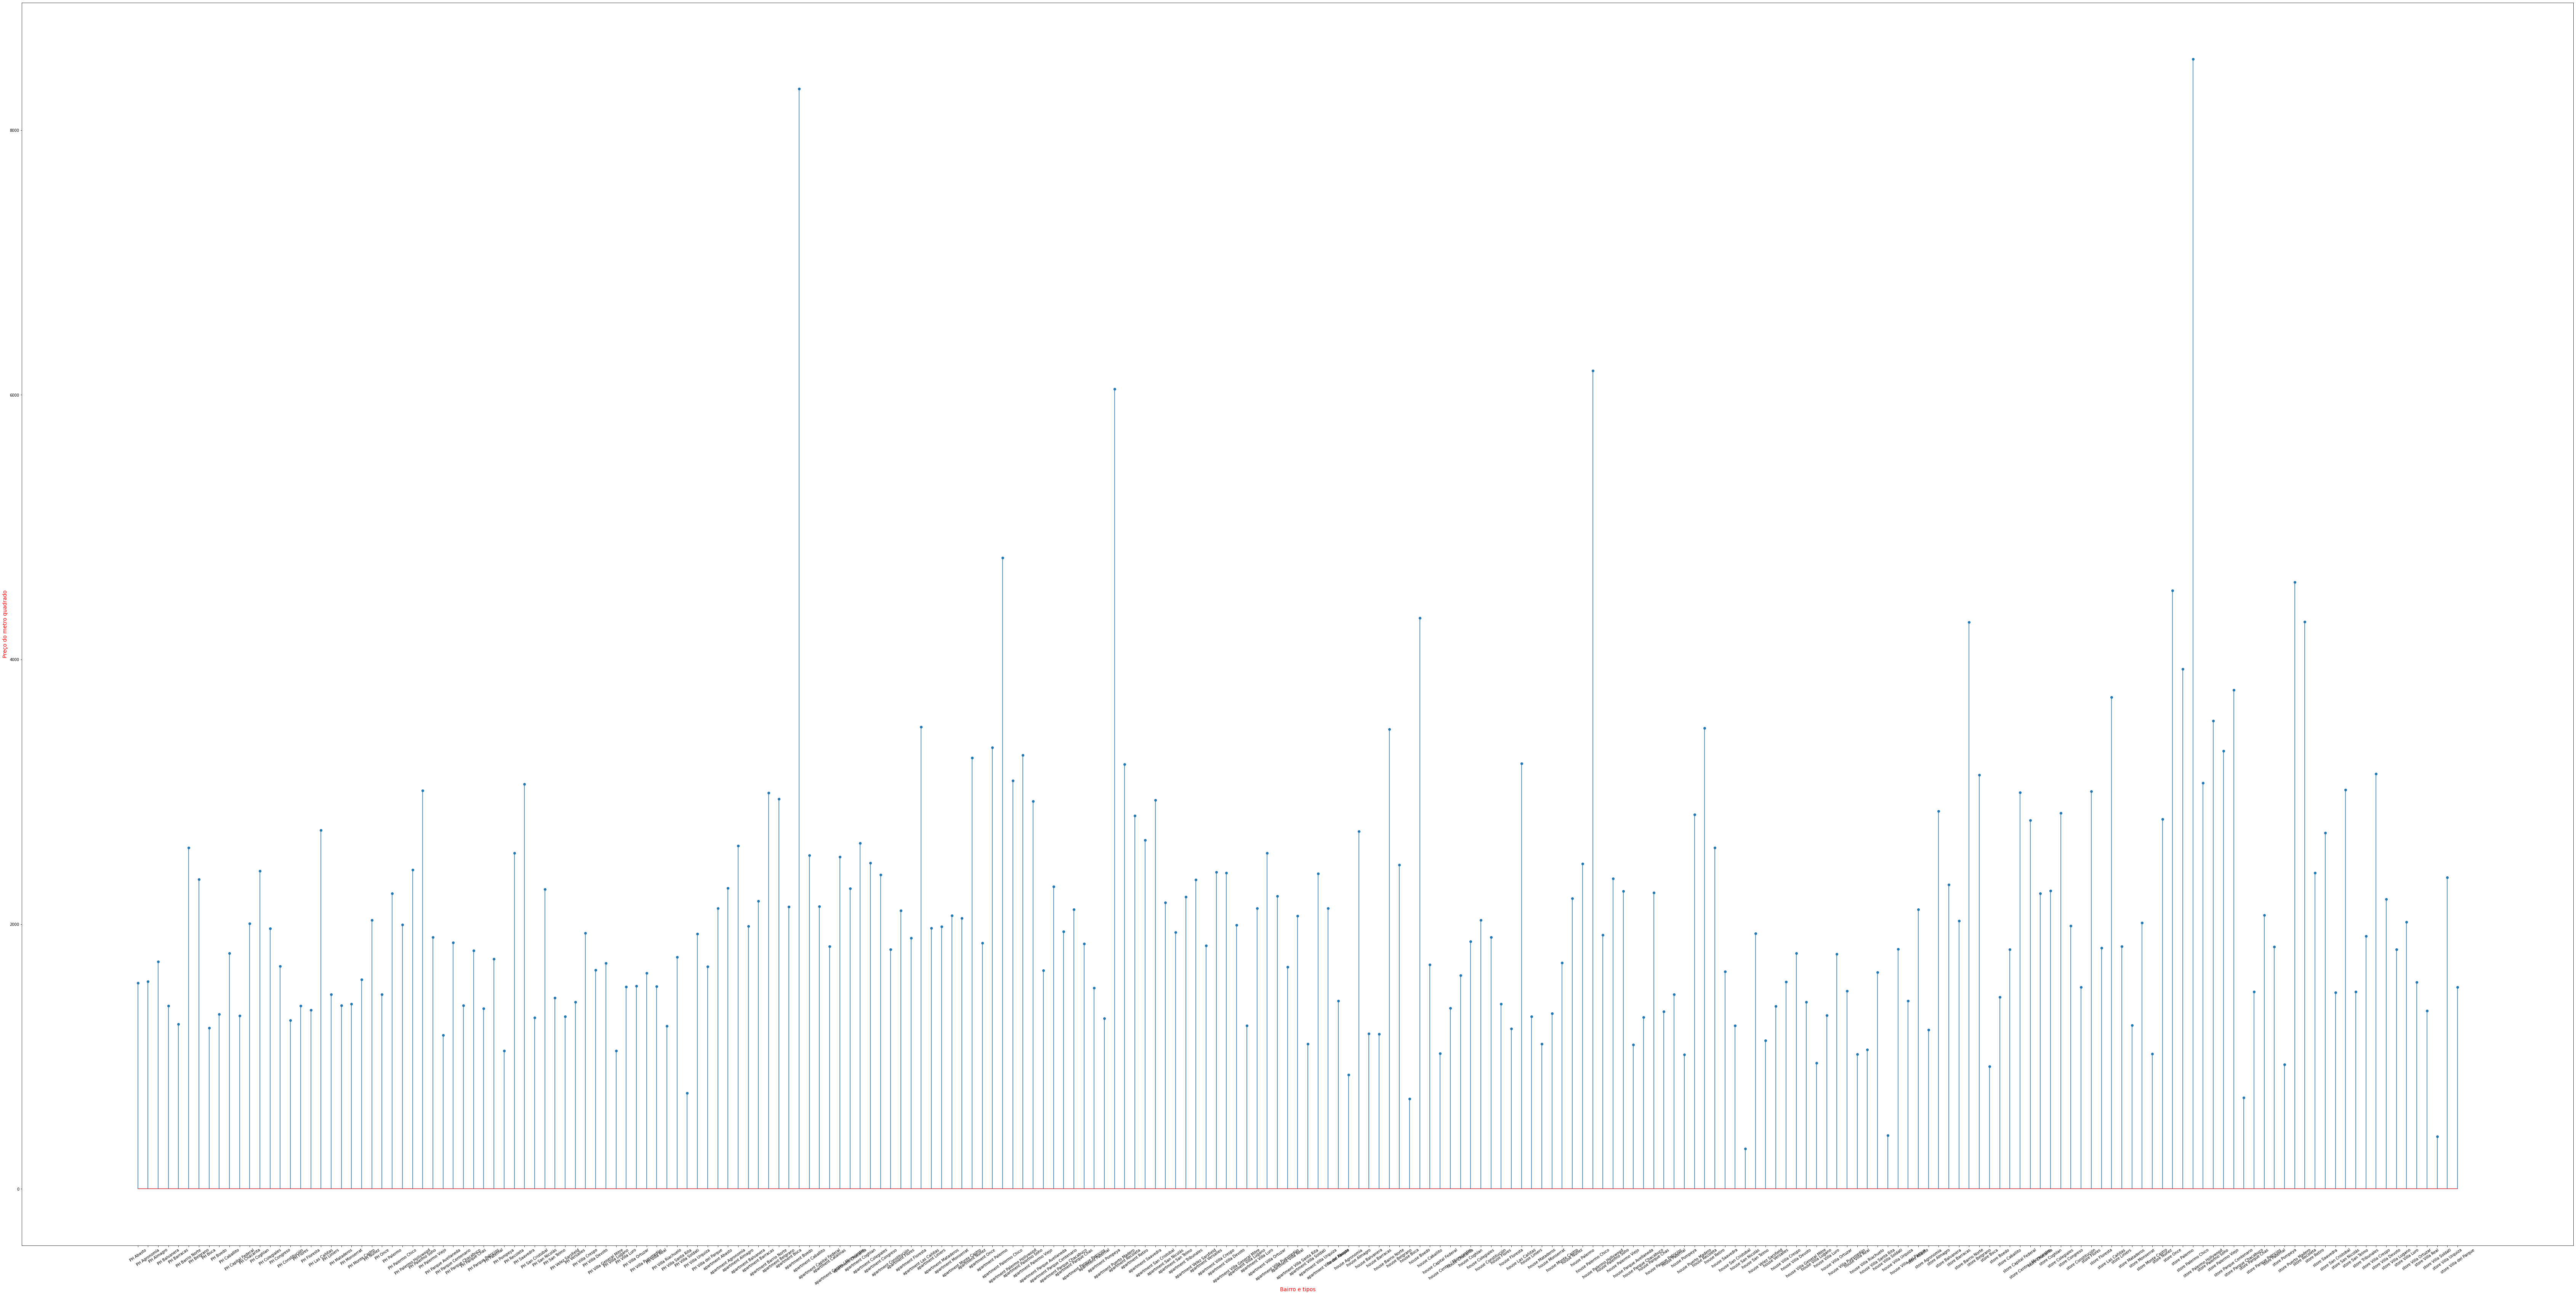

In [812]:
plt.figure(figsize = (120, 60))
plt.xlabel('Bairro e tipos', fontsize=14, color='red')
plt.ylabel('Preço do metro quadrado', fontsize=14, color='red')
plt.stem(medias_bairro_tipos_final.place_name_type, medias_bairro_tipos_final['mean'])
plt.xticks(rotation = 35)
plt.show()

<h4>3.4. Mapa de calor</h4>

In [813]:
map_hooray = folium.Map(location=[-34.62, -58.4],
                    zoom_start = 11) # Uses lat then lon. The bigger the zoom number, the closer in you get
map_hooray # Calls the map to display
#heat_df = dfmerge[dfmerge['Speed_limit']=='40'] # Reducing data size so it runs faster
#heat_df = dfmerge[dfmerge['Year']=='2007'] # Reducing data size so it runs faster
heat_df = dfmerge[['lat', 'lon']]
heat_df = heat_df.dropna(axis=0, subset=['lat','lon'])

# List comprehension to make out list of lists
heat_data = [[row['lat'],row['lon']] for index, row in heat_df.iterrows()]

# Plot it on the map
HeatMap(heat_data).add_to(map_hooray)

# Display the map
map_hooray

<p><h3>4. Os principais por preço do metro quadrado</h3></p>
<span>Demonstrar os cincos principais por valor do preço do metro quadrado</span>

<h4>4.1. Por localização do imovel</h4>

In [814]:
medias_bairro_ordenada= medias_bairro.sort_values(by=['mean'], ascending=False)
medias_bairro_ordenada

,max,min,mean,median
place_name,,,,
Boedo,34534.482759,320.362069,6949.329908,1951.219512
Puerto Madero,10869.565217,141.666667,5990.617770,5802.177964
Palermo Chico,20731.707317,1997.126437,4873.497964,4280.307802
Las Cañitas,6370.967742,1491.017964,3476.175811,3342.275281
Palermo,44900.000000,105.555556,3287.429045,3004.237288
...,...,...,...,...
Parque Avellaneda,2407.407407,211.111111,1384.643386,1428.571429
Villa Lugano,3478.260870,193.701923,1121.248006,1064.285714
Villa Riachuelo,1333.333333,769.230769,1110.690766,1229.508197


<h5>4.1.1. Maior custo por metro quadrado</h5>

In [815]:
medias_bairro_ordenada_5_maior=medias_bairro_ordenada.head(5)
medias_bairro_ordenada_5_maior

,max,min,mean,median
place_name,,,,
Boedo,34534.482759,320.362069,6949.329908,1951.219512
Puerto Madero,10869.565217,141.666667,5990.617770,5802.177964
Palermo Chico,20731.707317,1997.126437,4873.497964,4280.307802
Las Cañitas,6370.967742,1491.017964,3476.175811,3342.275281
Palermo,44900.000000,105.555556,3287.429045,3004.237288


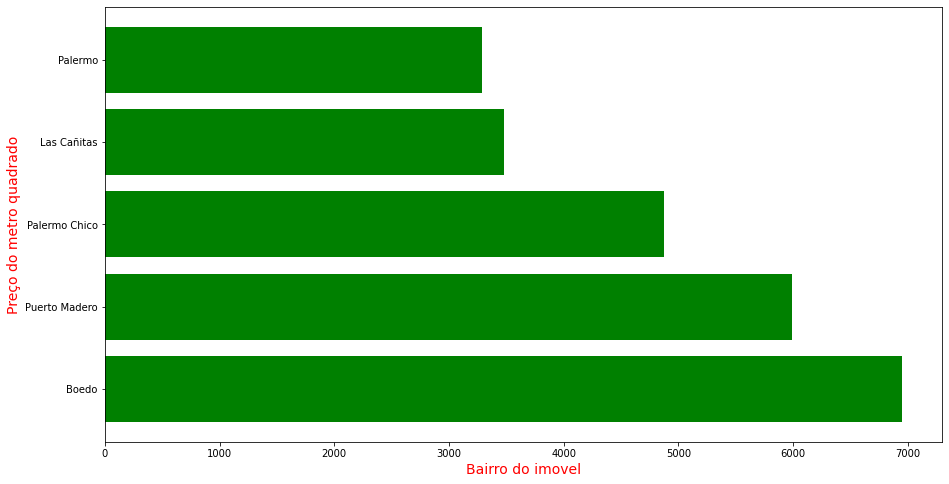

In [816]:
plt.figure(figsize = (15, 8))
plt.xlabel('Bairro do imovel', fontsize=14, color='red')
plt.ylabel('Preço do metro quadrado', fontsize=14, color='red')
plt.barh(medias_bairro_ordenada_5_maior.index, medias_bairro_ordenada_5_maior['mean'], color='green')
plt.show()

<h5>4.1.2. Menor custo por metro quadrado</h5>

In [817]:
medias_bairro_ordenada_5_menor=medias_bairro_ordenada.tail(5)
medias_bairro_ordenada_5_menor.sort_values(by=['mean'], ascending=True)

,max,min,mean,median
place_name,,,,
Villa Soldati,1720.000000,13.797467,743.666758,775.688994
Pompeya,2227.272727,461.538462,1090.532024,975.409836
Villa Riachuelo,1333.333333,769.230769,1110.690766,1229.508197
Villa Lugano,3478.260870,193.701923,1121.248006,1064.285714
Parque Avellaneda,2407.407407,211.111111,1384.643386,1428.571429


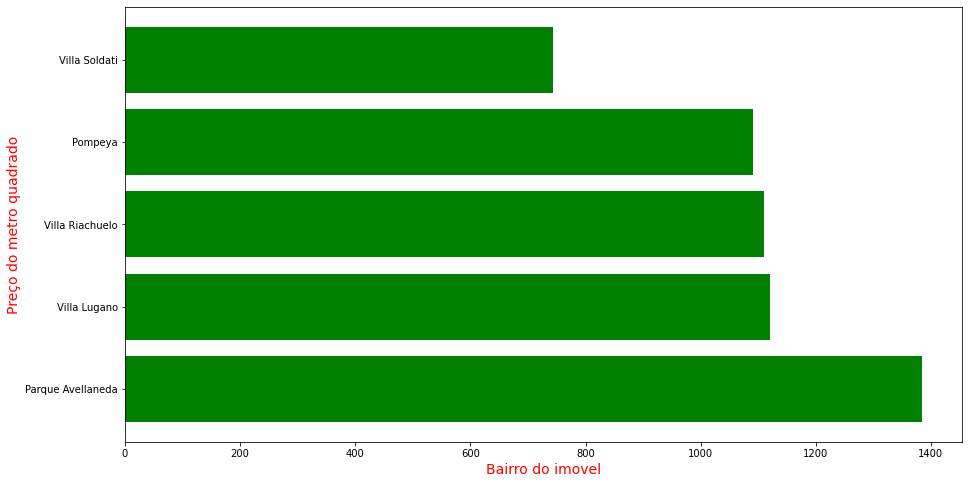

In [818]:
plt.figure(figsize = (15, 8))
plt.xlabel('Bairro do imovel', fontsize=14, color='red')
plt.ylabel('Preço do metro quadrado', fontsize=14, color='red')
plt.barh(medias_bairro_ordenada_5_menor.index, medias_bairro_ordenada_5_menor['mean'],color='green')
plt.show()

<h4>4.2. Por localização e tipo do imovel</h4>

In [819]:
medias_bairro_tipos_ordenada= medias_bairro_tipos_final.sort_values(by=['mean'], ascending=False)
medias_bairro_tipos_ordenada

,property_type,place_name,max,min,mean,median,place_name_type
202,store,Palermo Chico,8536.585366,8536.585366,8536.585366,8536.585366,store Palermo Chico
65,apartment,Boedo,34534.482759,320.362069,8313.162753,2200.000000,apartment Boedo
143,house,Palermo Chico,12121.212121,4417.177914,6183.271852,5527.777778,house Palermo Chico
96,apartment,Puerto Madero,10869.565217,2964.912281,6045.233312,5825.966153,apartment Puerto Madero
85,apartment,Palermo Chico,20731.707317,2322.580645,4769.882630,4177.927928,apartment Palermo Chico
...,...,...,...,...,...,...,...
207,store,Parque Chacabuco,722.543353,657.657658,690.100505,690.100505,store Parque Chacabuco
125,house,Boca,1423.357664,214.592275,678.966726,628.835307,house Boca
172,house,Villa Soldati,403.361345,403.361345,403.361345,403.361345,house Villa Soldati
226,store,Villa Soldati,775.688994,13.797467,394.743231,394.743231,store Villa Soldati


<h5>4.2.1. Maior custo por metro quadrado</h5>

In [820]:

medias_bairro_tipos_ordenada_5_maior=medias_bairro_tipos_ordenada.head(5)
medias_bairro_tipos_ordenada_5_maior


,property_type,place_name,max,min,mean,median,place_name_type
202,store,Palermo Chico,8536.585366,8536.585366,8536.585366,8536.585366,store Palermo Chico
65,apartment,Boedo,34534.482759,320.362069,8313.162753,2200.000000,apartment Boedo
143,house,Palermo Chico,12121.212121,4417.177914,6183.271852,5527.777778,house Palermo Chico
96,apartment,Puerto Madero,10869.565217,2964.912281,6045.233312,5825.966153,apartment Puerto Madero
85,apartment,Palermo Chico,20731.707317,2322.580645,4769.882630,4177.927928,apartment Palermo Chico


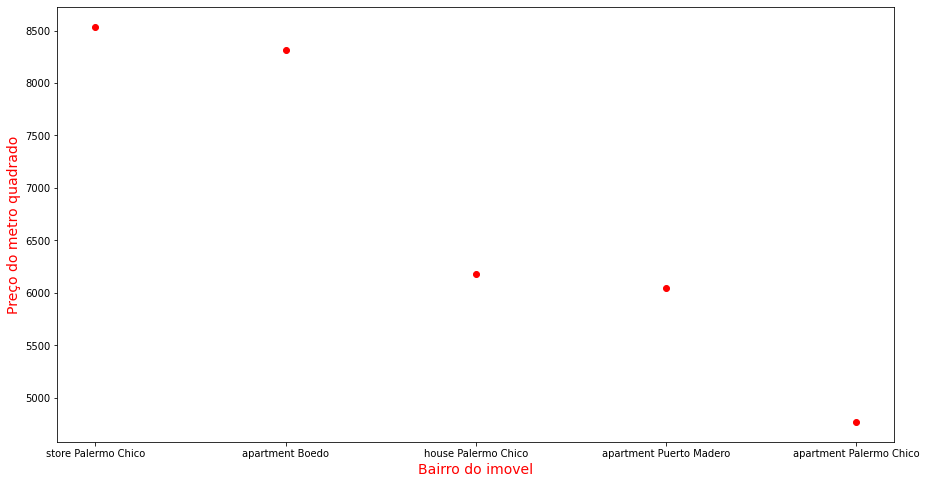

In [821]:
plt.figure(figsize = (15, 8))
plt.xlabel('Bairro do imovel', fontsize=14, color='red')
plt.ylabel('Preço do metro quadrado', fontsize=14, color='red')
plt.scatter(medias_bairro_tipos_ordenada_5_maior.place_name_type, medias_bairro_tipos_ordenada_5_maior['mean'],color='red')
plt.show()

<h5>4.2.2. Menor custo por metro quadrado</h5>

In [822]:
medias_bairro_tipos_ordenada_5_menor=medias_bairro_tipos_ordenada.tail(5)
medias_bairro_tipos_ordenada_5_menor.sort_values(by=['mean'], ascending=True)

,property_type,place_name,max,min,mean,median,place_name_type
158,house,San Nicolás,301.984469,301.984469,301.984469,301.984469,house San Nicolás
226,store,Villa Soldati,775.688994,13.797467,394.743231,394.743231,store Villa Soldati
172,house,Villa Soldati,403.361345,403.361345,403.361345,403.361345,house Villa Soldati
125,house,Boca,1423.357664,214.592275,678.966726,628.835307,house Boca
207,store,Parque Chacabuco,722.543353,657.657658,690.100505,690.100505,store Parque Chacabuco


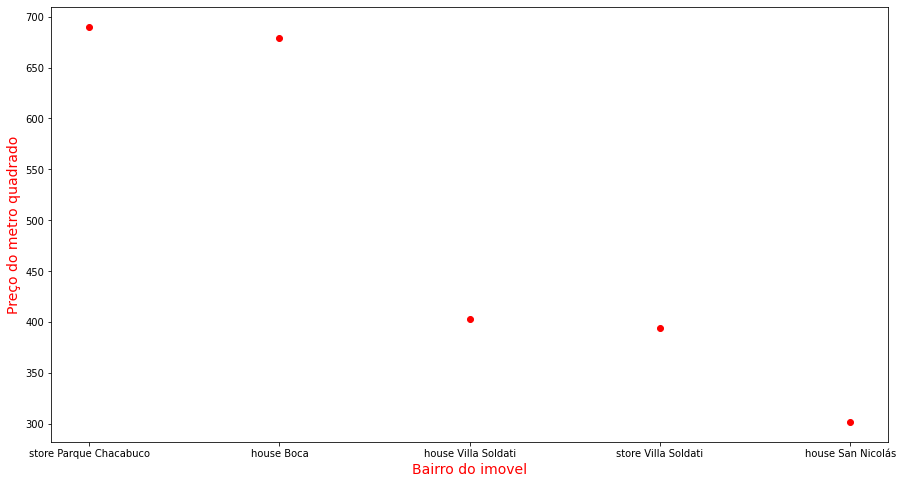

In [823]:
plt.figure(figsize = (15, 8))
plt.xlabel('Bairro do imovel', fontsize=14, color='red')
plt.ylabel('Preço do metro quadrado', fontsize=14, color='red')
plt.scatter(medias_bairro_tipos_ordenada_5_menor.place_name_type, medias_bairro_tipos_ordenada_5_menor['mean'],color='red')
plt.show()

<p><h3>5. Boxplot</h3></p>

In [824]:
#criei uma tabela para cada tipo

df_PH = dfmerge[dfmerge['property_type'].isin(['PH'])]

df_apartment = dfmerge[dfmerge['property_type'].isin(['apartment'])]

df_house = dfmerge[dfmerge['property_type'].isin(['house'])]

df_store = dfmerge[dfmerge['property_type'].isin(['store'])]


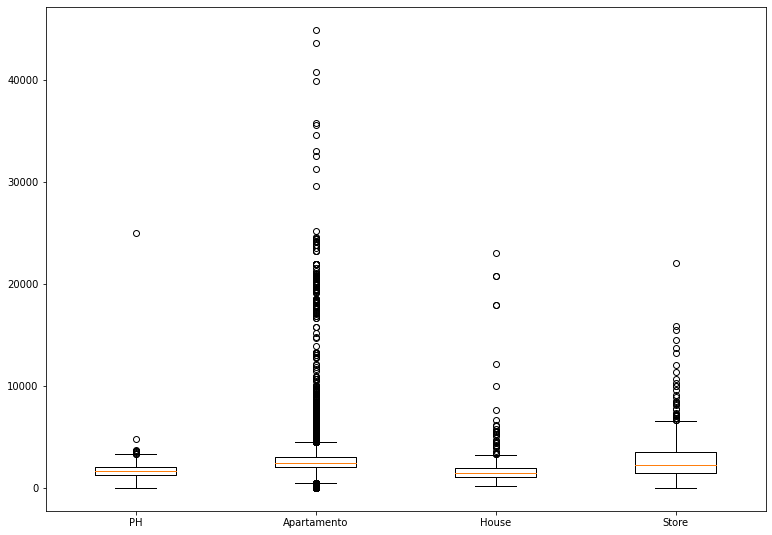

In [825]:
data_PH = df_PH['preco_metro'].tolist()
data_apartment = df_apartment['preco_metro'].tolist()
data_house = df_house['preco_metro'].tolist()
data_store = df_store['preco_metro'].tolist()

legenda = ['PH','Apartamento','House','Store']

data_boxplot = [data_PH, data_apartment, data_house, data_store]

fig = plt.figure(figsize =(10, 7))

ax = fig.add_axes([0, 0, 1, 1])
 
bp = ax.boxplot(data_boxplot,
               labels = legenda)

plt.show()

<h3>6. Macros Região</h3>

<h4>6.1. Metros quadrados totais por bairro</h4>

In [826]:
soma_bairros = dfmerge.groupby(['place_name'])['surface_total_in_m2_Final'].agg(['sum'])
soma_bairros_ordenado = soma_bairros.sort_values(by=['sum'], ascending=False)


soma_bairros_ordenado

,sum
place_name,
San Telmo,258565.000000
Belgrano,170015.000000
Palermo,149636.000000
Recoleta,130493.892209
Caballito,113526.985075
...,...
Agronomía,2379.000000
Parque Chas,1315.000000
Palermo Viejo,956.000000


In [827]:
soma_bairros_9 = soma_bairros_ordenado.head(9)
soma_bairros_9 = soma_bairros_9.reset_index(['place_name'])

soma_bairros_9

,place_name,sum
0,San Telmo,258565.000000
1,Belgrano,170015.000000
2,Palermo,149636.000000
3,Recoleta,130493.892209
4,Caballito,113526.985075
5,Flores,80390.000000
6,Barrio Norte,77855.368571
7,Capital Federal,72527.000000
8,Almagro,61908.000000


In [828]:
todos = soma_bairros_ordenado[9:62].agg(['sum',])
todos


,sum
sum,917695.714407


In [829]:
soma_bairros_10 = soma_bairros_9.append(todos)


soma_bairros_final = soma_bairros_10.fillna('Outros')

soma_bairros_final

C:\Users\l.beirao.de.souza\AppData\Local\Temp\ipykernel_18228\3689649083.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  soma_bairros_10 = soma_bairros_9.append(todos)


,place_name,sum
0,San Telmo,258565.000000
1,Belgrano,170015.000000
2,Palermo,149636.000000
3,Recoleta,130493.892209
4,Caballito,113526.985075
5,Flores,80390.000000
6,Barrio Norte,77855.368571
7,Capital Federal,72527.000000
8,Almagro,61908.000000
sum,Outros,917695.714407


In [830]:
# convert_dict = {'sum': int}

# soma_bairros_final = soma_bairros_final.astype(convert_dict)

soma_bairros_final = soma_bairros_10

soma_bairros_final.rename(columns = {'sum':'Soma'}, inplace = True)

soma_bairros_final = soma_bairros_10.fillna('Outros')

soma_bairros_final

,place_name,Soma
0,San Telmo,258565.000000
1,Belgrano,170015.000000
2,Palermo,149636.000000
3,Recoleta,130493.892209
4,Caballito,113526.985075
5,Flores,80390.000000
6,Barrio Norte,77855.368571
7,Capital Federal,72527.000000
8,Almagro,61908.000000
sum,Outros,917695.714407


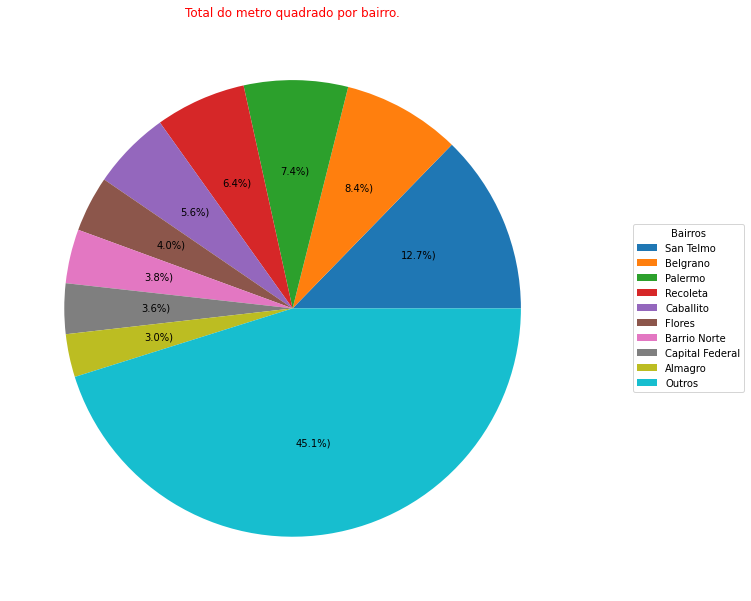

<Figure size 720x504 with 0 Axes>

In [831]:

def func(pct, allvalues): 
    absolute = int(pct / 100.*np.sum(allvalues)) 
    return "{:.1f}%)".format(pct, absolute) 

fig, ax = plt.subplots(figsize =(15, 10.5)) 
wedges, texts, autotexts = ax.pie(soma_bairros_final.Soma, 
                                  autopct = lambda pct: func(pct, soma_bairros_final.Soma),
                                  #labels = soma_bairros_final.place_name)
                                 )
fig, ax.legend(wedges, soma_bairros_final.place_name,
              title = "Bairros",
              loc = "center right",
              bbox_to_anchor = (1, 0, 0.3, 1))
                                
plt.title('Total do metro quadrado por bairro.', color='red')

fig = plt.figure(figsize =(10, 7)) 



#plt.pie(soma_bairros_final.Soma, labels = soma_bairros_final.place_name)
 
#plt.show()9

<h4>6.2. Bairros com maior somatória de preço</h4>

In [832]:
soma_preco = dfmerge.groupby(['place_name'])['price_usd'].agg(['sum'])
soma_preco_ordenado = soma_preco.sort_values(by=['sum'], ascending=False)

soma_preco_10 = soma_preco_ordenado.head(10)
soma_preco_10 = soma_preco_10.reset_index(['place_name'])

soma_preco_10

,place_name,sum
0,Belgrano,4.992549e+08
1,Palermo,4.955148e+08
2,Recoleta,4.337064e+08
3,Puerto Madero,3.478511e+08
4,Caballito,2.600270e+08
5,Barrio Norte,2.374276e+08
6,Palermo Chico,1.606518e+08
7,Flores,1.536502e+08
8,Nuñez,1.469756e+08
9,San Telmo,1.383404e+08


In [833]:
soma_preco_10.rename(columns = {'sum':'Soma'}, inplace = True)
soma_preco_10

,place_name,Soma
0,Belgrano,4.992549e+08
1,Palermo,4.955148e+08
2,Recoleta,4.337064e+08
3,Puerto Madero,3.478511e+08
4,Caballito,2.600270e+08
5,Barrio Norte,2.374276e+08
6,Palermo Chico,1.606518e+08
7,Flores,1.536502e+08
8,Nuñez,1.469756e+08
9,San Telmo,1.383404e+08


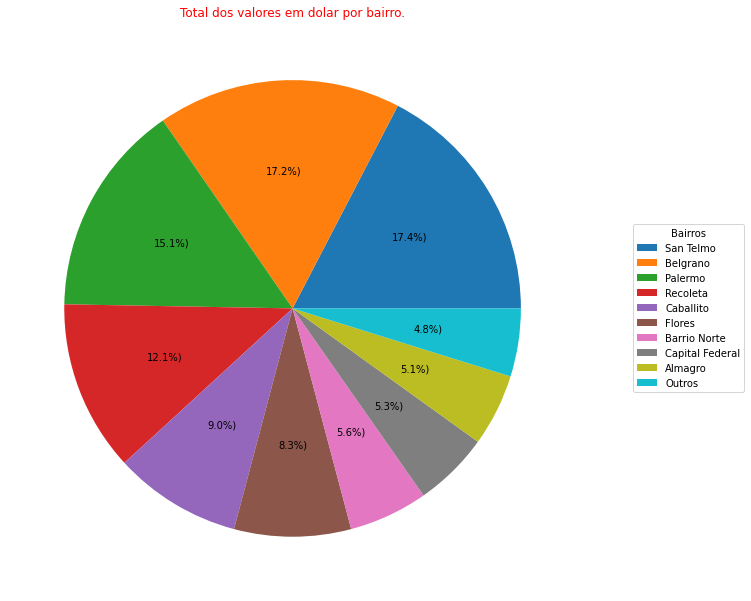

<Figure size 720x504 with 0 Axes>

In [834]:

def func(pct, allvalues): 
    absolute = int(pct / 100.*np.sum(allvalues)) 
    return "{:.1f}%)".format(pct, absolute) 
fig, ax = plt.subplots(figsize =(15, 10.5)) 
wedges, texts, autotexts = ax.pie(soma_preco_10.Soma, 
                                  autopct = lambda pct: func(pct, soma_preco_10.Soma),
                                  #labels = soma_preco_10.place_name
                                 )
fig, ax.legend(wedges, soma_bairros_final.place_name,
              title = "Bairros",
              loc = "center right",
              bbox_to_anchor = (1, 0, 0.3, 1))

plt.title('Total dos valores em dolar por bairro.', color='red')

fig = plt.figure(figsize =(10, 7)) 




#fig = plt.figure(figsize =(10, 7)) 
#plt.pie(soma_preco_10.Soma, labels = soma_preco_10.place_name)
#plt.show()

<h2>TRABALHO PRÁTICO II</h2>

<p><h3>7. Selecionando as informações</h3></p>
<span>Para o subconjunto, o tipo de propriedade escolhido foi o tipo "Apartment", pois é o unico tipo com registros suficientes para o trabalho. Os bairros ecolhidos foram Recoleta e Palermo, por serem bairros próximos um do outro e com grande quatidade de apartamentos.</span>

In [835]:
dfApartament = dfmerge[(dfmerge["property_type"] == "apartment") & ((dfmerge["place_name"] == "Recoleta") | (dfmerge["place_name"] == "Palermo"))]
dfApartament

,property_type,place_name,country_name,state_name,lat,lon,price,currency,surface_total_in_m2_media,surface_total_in_m2_Final,price_usd,preco_metro
1509,apartment,Palermo,Argentina,Capital Federal,-34.580504,-58.405874,350000.0,USD,90.108859,104.0,350000.0,3365.384615
1510,apartment,Palermo,Argentina,Capital Federal,-34.590926,-58.411665,270500.0,USD,90.108859,118.0,270500.0,2292.372881
1511,apartment,Palermo,Argentina,Capital Federal,-34.588862,-58.412307,147300.0,USD,90.108859,39.0,147300.0,3776.923077
1512,apartment,Palermo,Argentina,Capital Federal,-34.566479,-58.434075,440000.0,USD,90.108859,175.0,440000.0,2514.285714
1513,apartment,Palermo,Argentina,Capital Federal,-34.590243,-58.436402,179000.0,USD,90.108859,70.0,179000.0,2557.142857
...,...,...,...,...,...,...,...,...,...,...,...,...
6942,apartment,Recoleta,Argentina,Capital Federal,-34.594886,-58.404803,258000.0,USD,127.892209,115.0,258000.0,2243.478261
6943,apartment,Recoleta,Argentina,Capital Federal,-34.590285,-58.400306,170000.0,USD,127.892209,71.0,170000.0,2394.366197
6944,apartment,Recoleta,Argentina,Capital Federal,-34.593480,-58.405057,265000.0,USD,127.892209,84.0,265000.0,3154.761905
6945,apartment,Recoleta,Argentina,Capital Federal,-34.590628,-58.397539,325000.0,USD,127.892209,113.0,325000.0,2876.106195


<h3>8. Regressão Linear</h3>

In [836]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.inspection import permutation_importance
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor

<h4>8.1. Regressão linear simples</h4>

In [837]:
def info_simple(eixo_y, previsoes):
    #Avaliando desempemho
    print ("Avaliação de Desempenho:")    
    print ("MSE:", metrics.mean_squared_error(eixo_y, previsoes))
    print ("RMSE:",np.sqrt(metrics.mean_squared_error(eixo_y, previsoes)) )
    print ('MAE:', metrics.mean_absolute_error(eixo_y, previsoes))
    print ('R2:', metrics.r2_score(eixo_y, previsoes))
    

In [838]:
def chart_simple(eixo_x, eixo_y, previsoes, label_x, label_y):
    plt.figure(figsize = (10,5))
    plt.scatter(eixo_x, eixo_y, color='red' )
    plt.plot( eixo_x, previsoes)

    plt.title('Regressão linear simples')
    plt.xlabel(label_x)
    plt.ylabel(label_y)

In [839]:

def generate_regression_simple(dadosApartment, label_x, label_y):
    dfAp = dfApartament[dadosApartment]
        
    eixo_x = dfAp.iloc[:,1].values 
    eixo_y = dfAp.iloc[:,0].values
    
    #Tranformando os dados em matriz
    eixo_x = eixo_x.reshape(-1, 1)
    eixo_y = eixo_y.reshape(-1, 1)

    funcao_Regressao = LinearRegression()
    model = funcao_Regressao.fit( eixo_x, eixo_y )
    previsoes = funcao_Regressao.predict(eixo_x)    
    
    
    chart_simple(eixo_x, eixo_y, previsoes, label_x, label_y)
    #Avaliando desempemho
    info_simple(eixo_y, previsoes)

<h5>8.1.1. Regressão por preço do metro quadrado</h5>

Avaliação de Desempenho:
MSE: 3438200.4445659216
RMSE: 1854.2385080042754
MAE: 890.8479766602733
R2: 0.005504611003482762


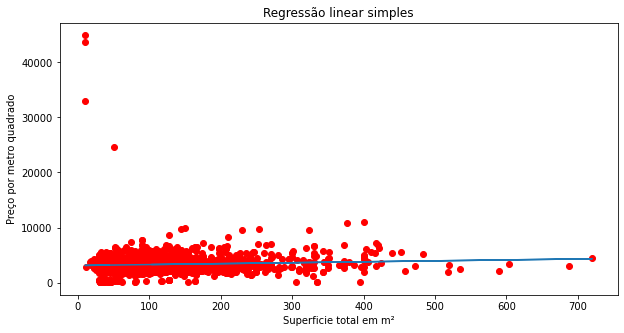

In [840]:
dadosApartment_preco_metro = ["preco_metro",'surface_total_in_m2_Final']
generate_regression_simple(dadosApartment_preco_metro, 'Superficie total em m²', 'Preço por metro quadrado')

<h5>8.1.2. Regressão por preço em dólar</h5>

Avaliação de Desempenho:
MSE: 42076207770.5966
RMSE: 205124.85897763976
MAE: 105106.98395402898
R2: 0.6970100352891391


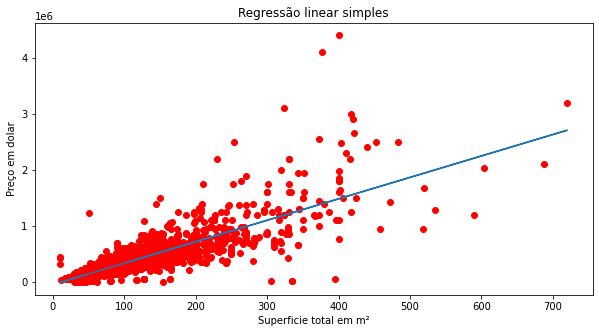

In [841]:
dadosApartment_price_usd = ["price_usd",'surface_total_in_m2_Final']
generate_regression_simple(dadosApartment_price_usd, 'Superficie total em m²', 'Preço em dolar')

<h4>8.2. Regressão múltipla</h4>

In [842]:
def info_multiple(model,X, y, predictions):
    print ('Intercepto = ', ' ', model.intercept_)
    print ('RM = ', ' ', model.coef_)
    print ('R2_train = ', ' ', model.score(X, y))
    
    print ("MSE:", metrics.mean_squared_error(y, predictions))
    print ("RMSE:",np.sqrt(metrics.mean_squared_error(y, predictions)) )
    print ('MAE:', metrics.mean_absolute_error(y, predictions))
    print ('R2:', metrics.r2_score(y, predictions))

In [843]:
def chart_multiple(y,predictions, label_x, label_y):
    plt.figure(figsize = (20,10))
    plt.plot(y, 
         y, 
         '-.', 
         c = 'grey'
        )
    
    plt.scatter(predictions, 
            y, 
            s = 50, 
            c = 'r', 
            marker = '+', 
            zorder = 10
           )   
    plt.title('Regressão linear múltipla')
    plt.xlabel(label_x)
    plt.ylabel(label_y)
    plt.show()

<span>O método Permutation Importance será utilizado no modelo de Regressão Múltipla para avaliar o impacto das features sobre o modelo.</span>

In [844]:
def generate_feature_importance(model, X, y):
    return permutation_importance(model, X, y, n_repeats=10, random_state=0)

In [845]:
def info_feature_importance(model, X_test, y_test):
    feature_importance = generate_feature_importance(model, X_test, y_test)

    column_names = X_test.columns
    result = pd.Series(feature_importance.importances_mean, index=column_names)
    result.sort_values(ascending=False)
    print(result)
    print("------X-----X----X-------X---X---X")

In [846]:
def generate_regression_multiple(variaveis, targets, label_x, label_y):
    X = dfApartament[variaveis]
    y = targets   
    
    # usa shuffle = False para evitar data leakage
    X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle = False)
    linreg = LinearRegression()
    model_multiple = linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    info_feature_importance(model_multiple, X_test, y_test)
    info_multiple(model_multiple,X_test, y_test, y_pred)
    chart_multiple(y_test, y_pred, label_x, label_y)

In [847]:
def generate_regression_multiple_normalizer(variaveis, targets, label_x, label_y):
    
    X = dfApartament[variaveis]
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(X)
    X_scaled = pd.DataFrame(data_scaled, columns=X.columns)
    
    y = targets   
    
    # usa shuffle = False para evitar data leakage
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, shuffle = False)
    linreg = LinearRegression()
    model_multiple = linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    info_feature_importance(model_multiple, X_test, y_test)
    info_multiple(model_multiple,X_test, y_test, y_pred)
    chart_multiple(y_test, y_pred, label_x, label_y)

<h5>8.2.1. Regressão por preço do metro quadrado</h5>

lat    0.165391
lon    0.066719
dtype: float64
------X-----X----X-------X---X---X
Intercepto =    2850205.0388287175
RM =    [46313.05835278 21314.18970682]
R2_train =    -0.05952727566411942
MSE: 1107402.7073803702
RMSE: 1052.332032858627
MAE: 795.543405399754
R2: -0.05952727566411942


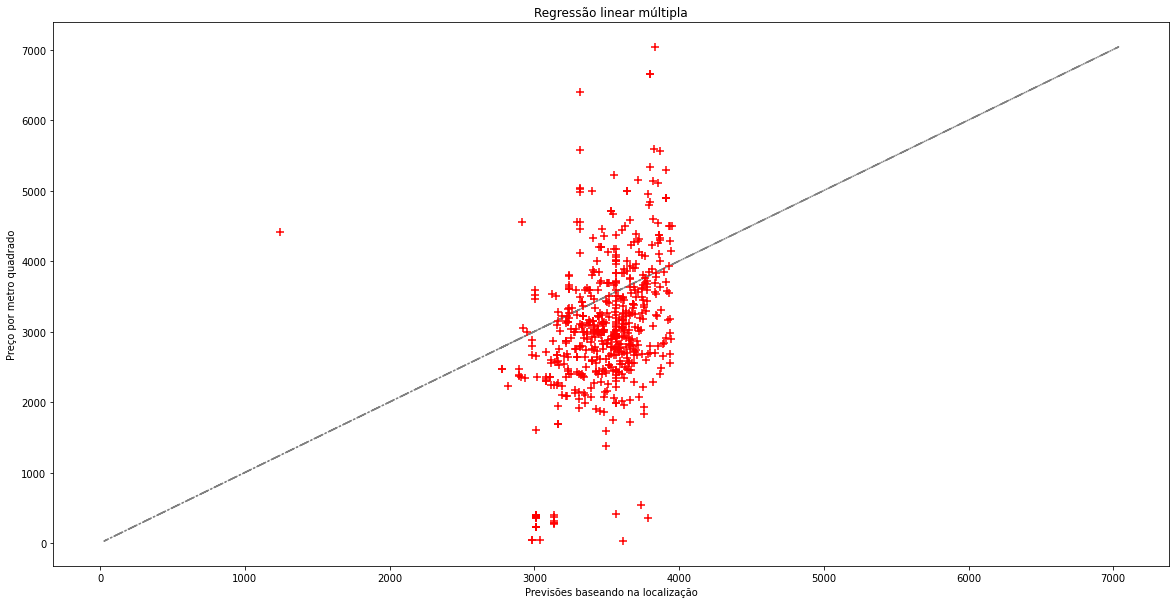

In [848]:
generate_regression_multiple(['lat', 'lon'], dfApartament["preco_metro"],"Previsões baseando na localização","Preço por metro quadrado")

lat          0.041753
lon         -0.000362
price_usd    0.550125
dtype: float64
------X-----X----X-------X---X---X
Intercepto =    668693.1662002571
RM =    [1.83370224e+04 5.44722783e+02 1.91174863e-03]
R2_train =    0.1957792893493866
MSE: 840559.9485370703
RMSE: 916.8205650709796
MAE: 704.5320888159223
R2: 0.1957792893493866


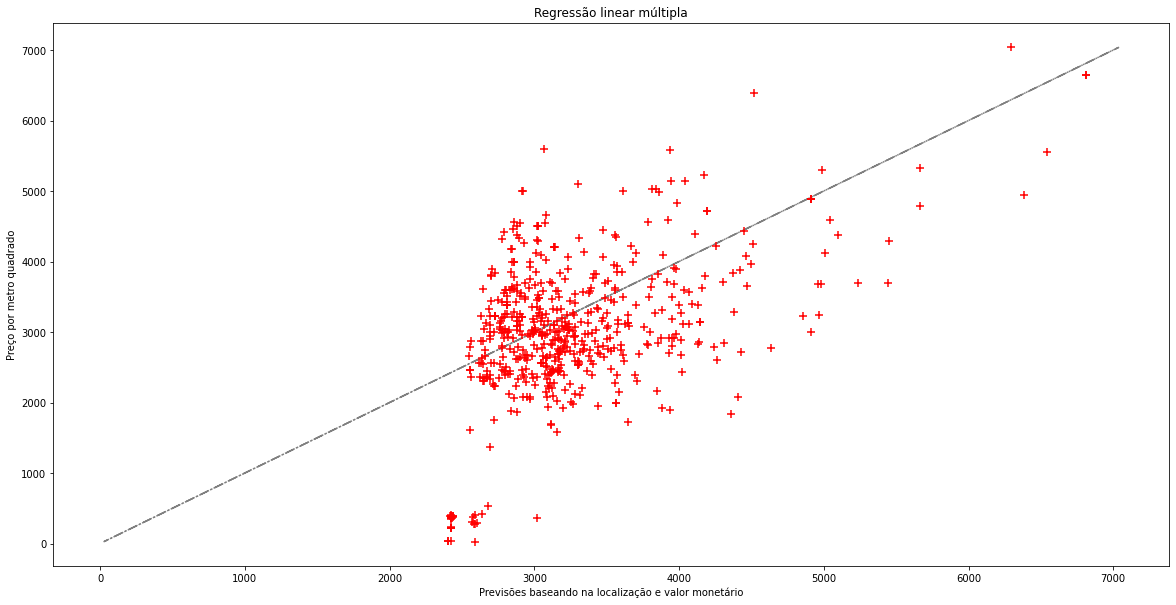

In [849]:
generate_regression_multiple(['lat', 'lon', 'price_usd'], dfApartament["preco_metro"],"Previsões baseando na localização e valor monetário","Preço por metro quadrado")

lat                          0.157016
lon                          0.054213
surface_total_in_m2_Final    0.001688
dtype: float64
------X-----X----X-------X---X---X
Intercepto =    2692575.3773855255
RM =    [4.45416616e+04 1.96657687e+04 6.97184975e-01]
R2_train =    -0.05551055245115544
MSE: 1103204.4859065097
RMSE: 1050.335415906038
MAE: 793.6079027307653
R2: -0.05551055245115544


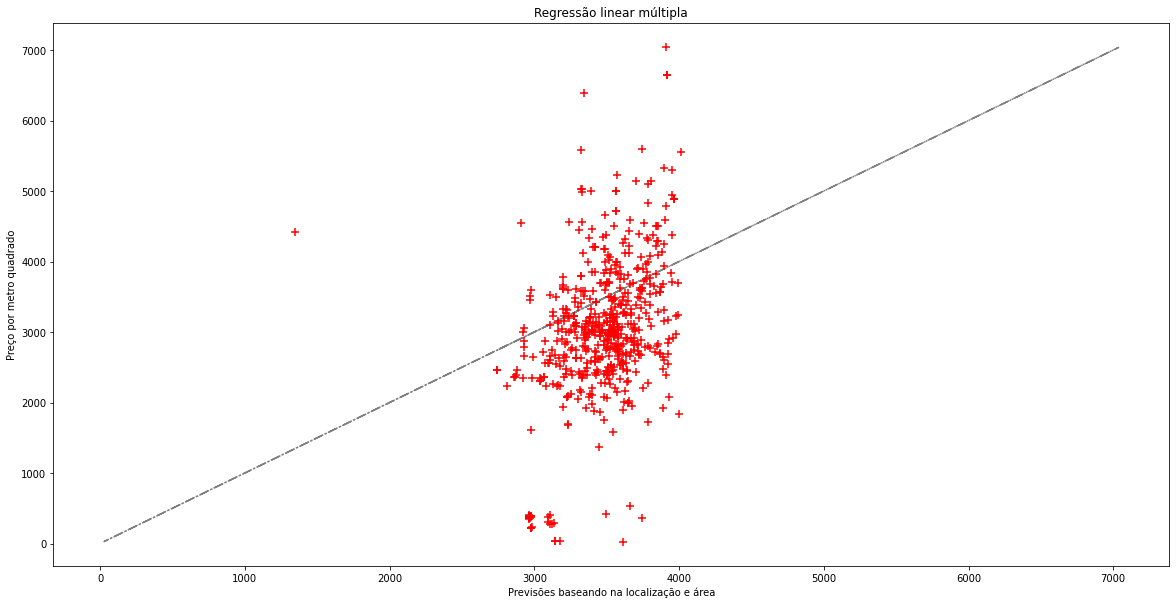

In [850]:
generate_regression_multiple(['lat', 'lon', 'surface_total_in_m2_Final'], dfApartament["preco_metro"],"Previsões baseando na localização e área","Preço por metro quadrado")

lat                          0.027833
lon                          0.043473
surface_total_in_m2_Final    4.725013
price_usd                    6.278011
dtype: float64
------X-----X----X-------X---X---X
Intercepto =    1433065.1169990923
RM =    [ 2.08082963e+04  1.21515121e+04 -2.04389631e+01  5.29158999e-03]
R2_train =    0.4571634037381159
MSE: 567365.0222819957
RMSE: 753.2363654803157
MAE: 470.91370197155516
R2: 0.4571634037381159


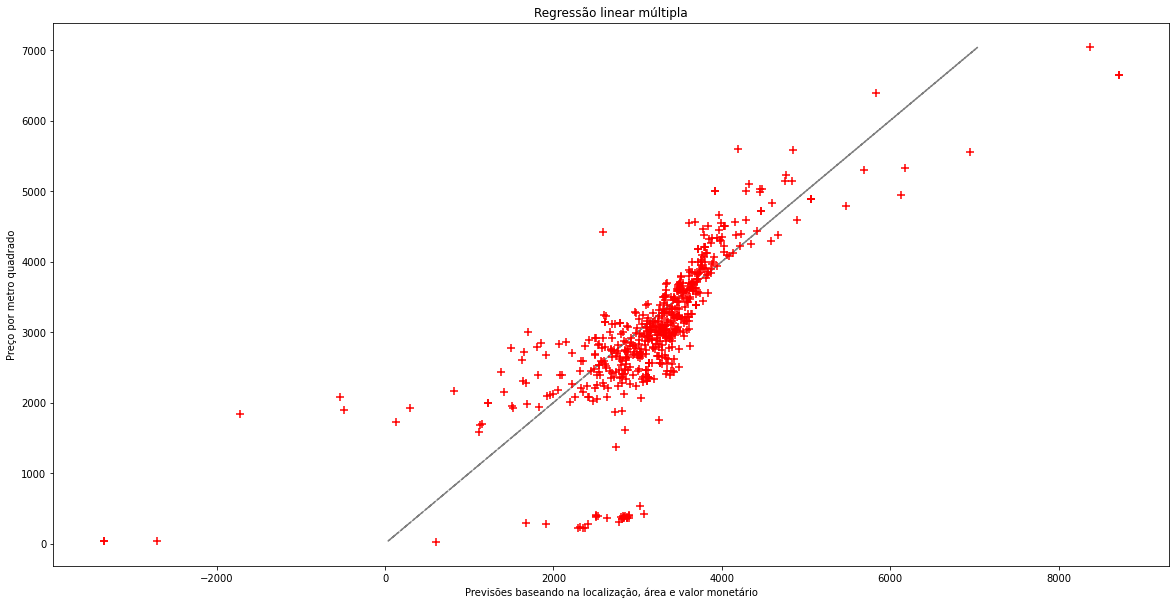

In [851]:
generate_regression_multiple(['lat', 'lon', 'surface_total_in_m2_Final','price_usd'], dfApartament["preco_metro"],"Previsões baseando na localização, área e valor monetário","Preço por metro quadrado")

Lembando que : Um valor negativo significa que estamos estimando pior do que usando a média.

<h5>8.2.2. Regressão por preço em dólar</h5>

lat    0.098544
lon    0.214529
dtype: float64
------X-----X----X-------X---X---X
Intercepto =    1141108116.077032
RM =    [14633741.88904317 10864120.23254806]
R2_train =    0.05833892007186825
MSE: 98939750504.13121
RMSE: 314546.89714592835
MAE: 249503.4768388349
R2: 0.05833892007186825


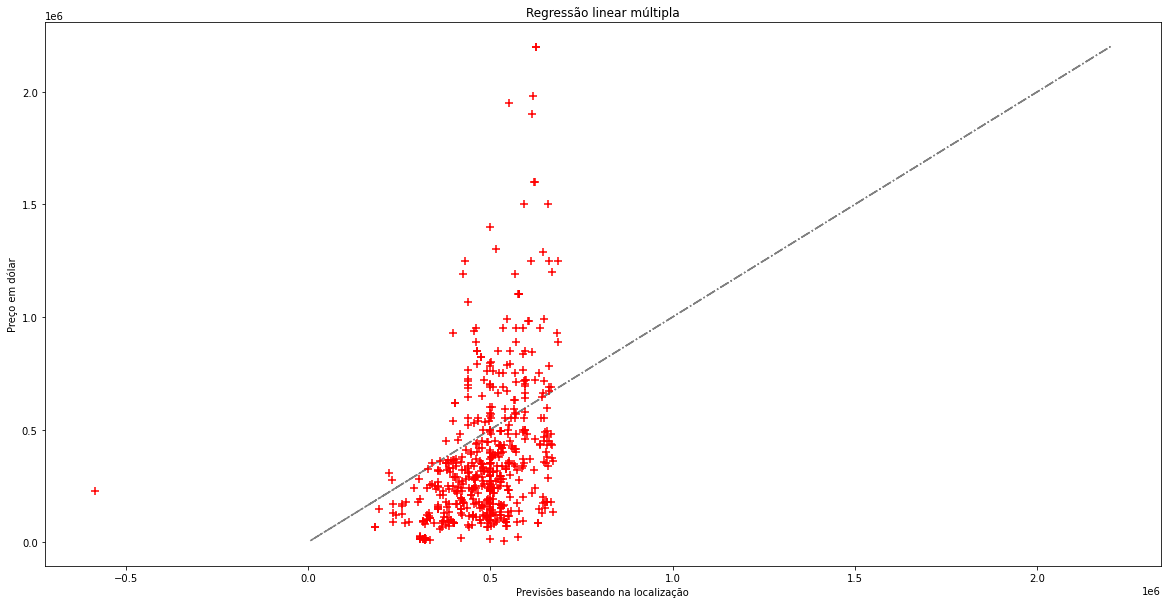

In [852]:
generate_regression_multiple(['lat', 'lon'], dfApartament["price_usd"],"Previsões baseando na localização","Preço em dólar")

lat            0.055134
lon            0.171978
preco_metro    0.140024
dtype: float64
------X-----X----X-------X---X---X
Intercepto =    972653176.454475
RM =    [1.18965130e+07 9.60439313e+06 5.91027443e+01]
R2_train =    0.2064357593875863
MSE: 83379306683.4459
RMSE: 288754.751793708
MAE: 221912.82367706843
R2: 0.2064357593875863


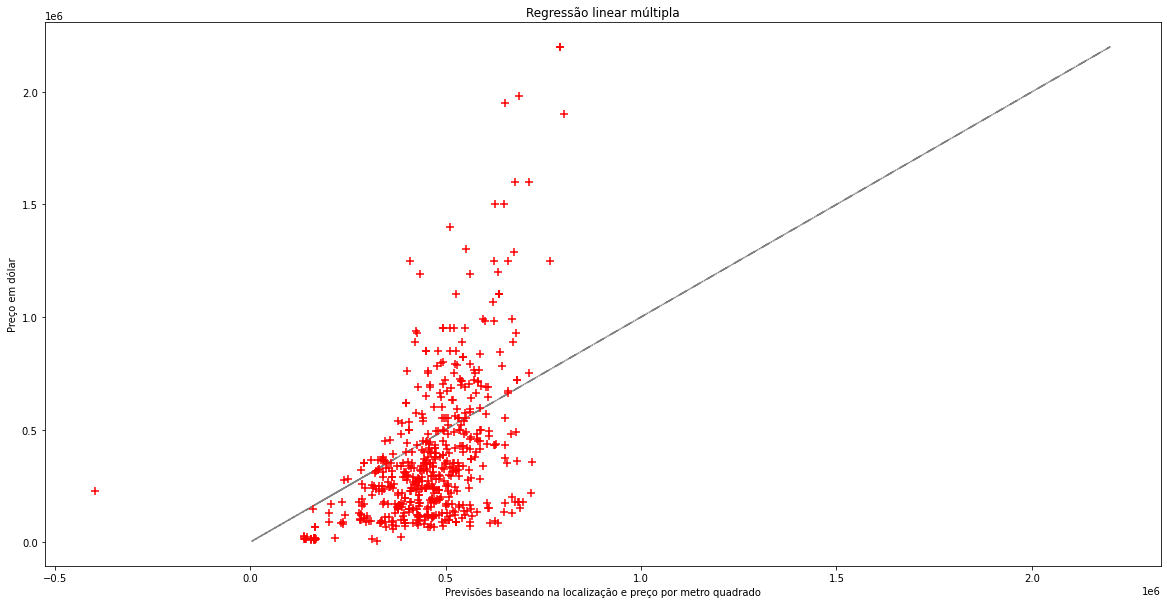

In [853]:
generate_regression_multiple(['lat', 'lon', 'preco_metro'], dfApartament["price_usd"],"Previsões baseando na localização e preço por metro quadrado","Preço em dólar")

lat                          0.018444
lon                         -0.002191
surface_total_in_m2_Final    1.754041
dtype: float64
------X-----X----X-------X---X---X
Intercepto =    238021135.7651224
RM =    [4.48511040e+06 1.42003756e+06 3.99429059e+03]
R2_train =    0.6537785649827306
MSE: 36377273235.50984
RMSE: 190728.27067718576
MAE: 111903.89896432731
R2: 0.6537785649827306


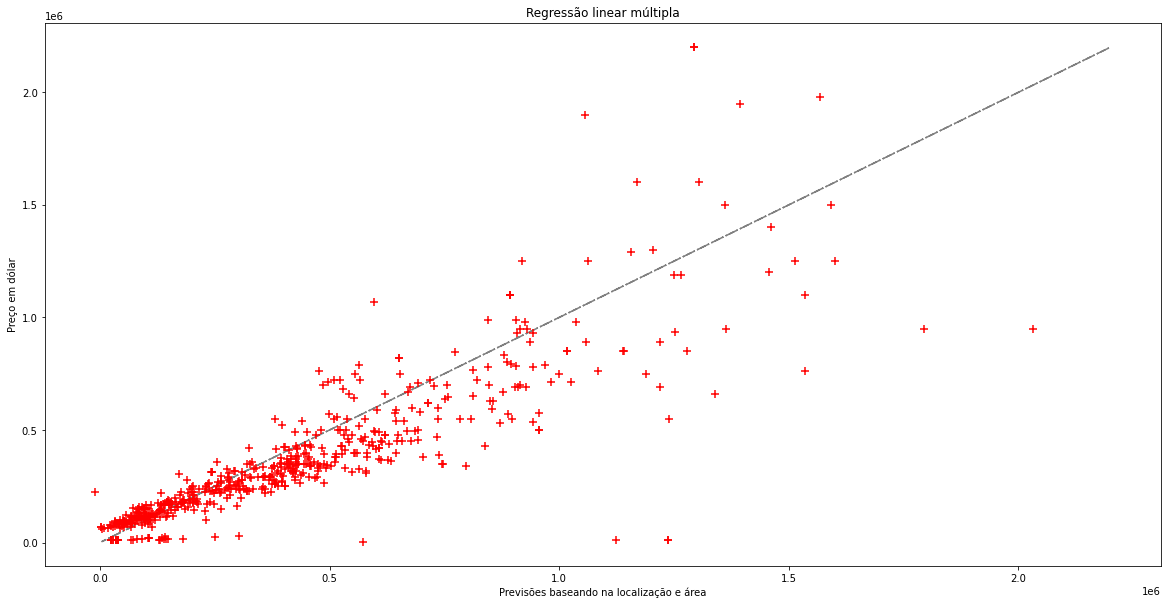

In [854]:
generate_regression_multiple(['lat', 'lon', 'surface_total_in_m2_Final'], dfApartament["price_usd"],"Previsões baseando na localização e área","Preço em dólar")

lat                          0.004348
lon                         -0.001003
surface_total_in_m2_Final    1.731732
preco_metro                  0.126474
dtype: float64
------X-----X----X-------X---X---X
Intercepto =    88386334.77981783
RM =    [2.00979152e+06 3.27149539e+05 3.95554585e+03 5.55731150e+01]
R2_train =    0.7767243282300533
MSE: 23459437508.287804
RMSE: 153164.73976828938
MAE: 83431.72279793675
R2: 0.7767243282300533


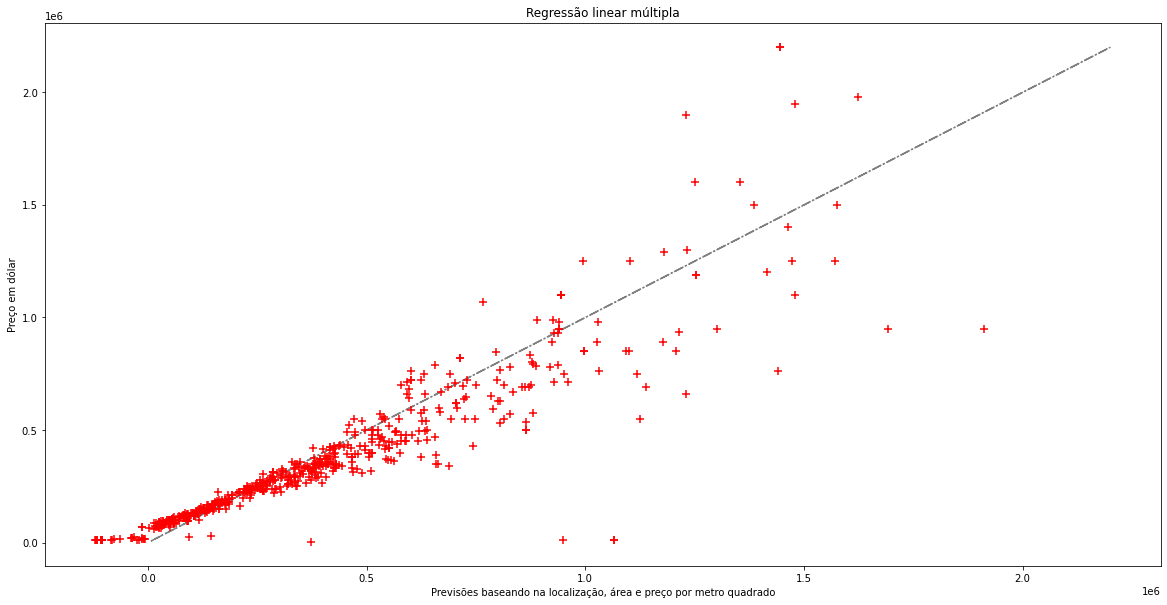

In [855]:
generate_regression_multiple(['lat', 'lon', 'surface_total_in_m2_Final','preco_metro'], dfApartament["price_usd"],"Previsões baseando na localização, área e preço por metro quadrado","Preço em dólar")

<p><h5>8.2.3. Normalizando o modelo</h5></p>
Levando em consideração o objetivo final, no qual devemos focar no preço do metro quadrado, e baseando na <b>Permutation Importance</b>. Consideramos as variáveis que tem mais influência sobre o modelo e normalizamos os dados antes de treinar utilizando Standard Scaler.

surface_total_in_m2_Final    4.582739
price_usd                    6.496794
dtype: float64
------X-----X----X-------X---X---X
Intercepto =    3299.5824000194593
RM =    [-1628.04176816  2014.56803227]
R2_train =    0.46453882736491625
MSE: 559656.3353232043
RMSE: 748.1018214943767
MAE: 463.6986715213796
R2: 0.46453882736491625


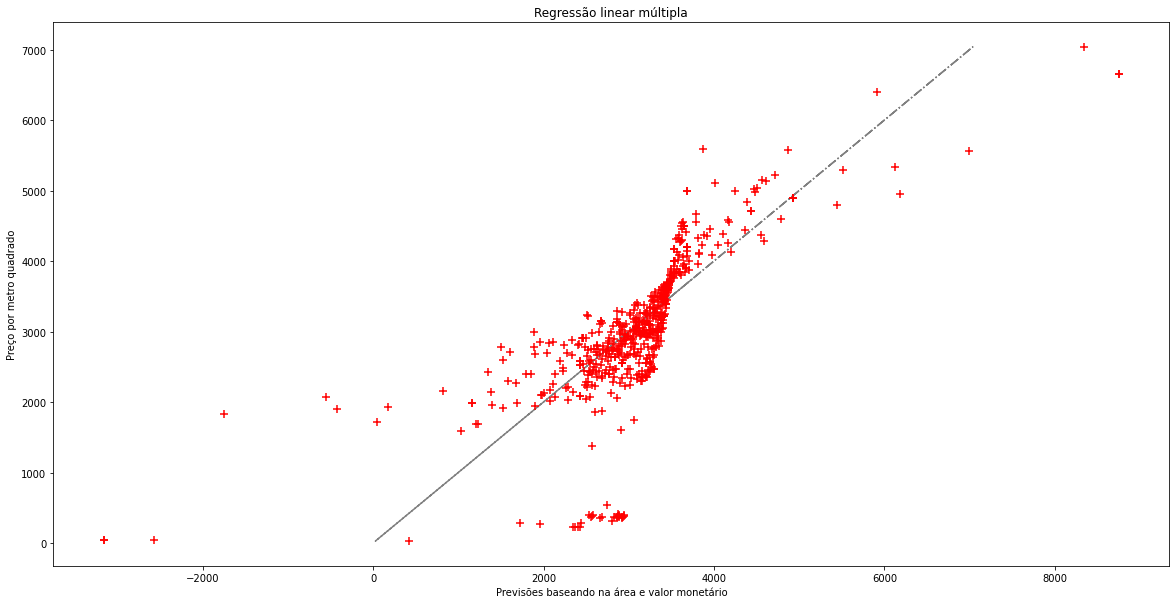

In [856]:
generate_regression_multiple_normalizer(['surface_total_in_m2_Final','price_usd'], dfApartament["preco_metro"],"Previsões baseando na área e valor monetário","Preço por metro quadrado")

<h4>8.3. Regressão RLM com statsmodels</h4>

<span>A regressão linear robusta tem maior eficiência para dados com muita discrepância, visto que, a estimativa usando os métodos de Huber são menos distorcidas por causa dos outlier.</span>

In [857]:
def info_rlm(y, predictions_rlm, model):
    
    # Imprimimos o MSE e um resumo do modelo 
    print ("MSE:", metrics.mean_squared_error(y, predictions_rlm))
    print ("RMSE:",np.sqrt(metrics.mean_squared_error(y, predictions_rlm)) )
    print ('MAE:', metrics.mean_absolute_error(y, predictions_rlm))
    print ('R2:', metrics.r2_score(y, predictions_rlm))
    print (model.summary())

In [858]:
def chart_rlm(y,predictions_rlm,label_x, label_y):
     # Plotamos os resultados
    plt.figure(figsize = (20,10))
    plt.plot(y, 
            y, 
            '-.', 
            c = 'grey'
            )

    plt.scatter(predictions_rlm, 
                y, 
                s = 30, 
                c = 'r', 
                marker = '+', 
                zorder = 10
            )
    plt.title('Regressão linear RLM')
    plt.xlabel(label_x)
    plt.ylabel(label_y)
    plt.show()





In [859]:
def generate_regression_rlm(variaveis, targets,label_x, label_y):
    X = dfApartament[variaveis]
    y = dfApartament[targets]
    # Teremos que agregar explícitamente uma constante:
    X = sm.add_constant(X)
    resrlm = sm.RLM(y, X).fit()
    predictions_rlm = resrlm.predict(X)

    chart_rlm(y,predictions_rlm, label_x, label_y)
    info_rlm(y, predictions_rlm, resrlm)
    

<h5>8.3.1. Regressão por preço do metro quadrado</h5>

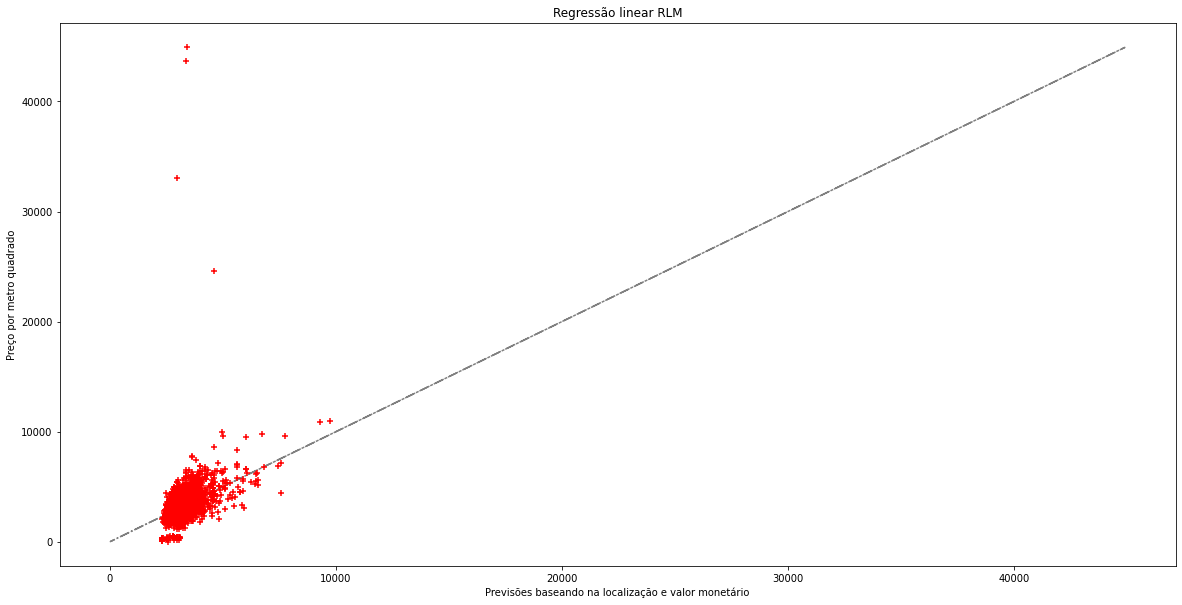

MSE: 2933252.2470322433
RMSE: 1712.6740048918368
MAE: 755.0727937173051
R2: 0.15156027652555082
                    Robust linear Model Regression Results                    
Dep. Variable:            preco_metro   No. Observations:                 2270
Model:                            RLM   Df Residuals:                     2266
Method:                          IRLS   Df Model:                            3
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Fri, 01 Jul 2022                                         
Time:                        17:08:34                                         
No. Iterations:                    17                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------

In [860]:
generate_regression_rlm(['lat', 'lon', 'price_usd'],["preco_metro"],"Previsões baseando na localização e valor monetário", "Preço por metro quadrado")

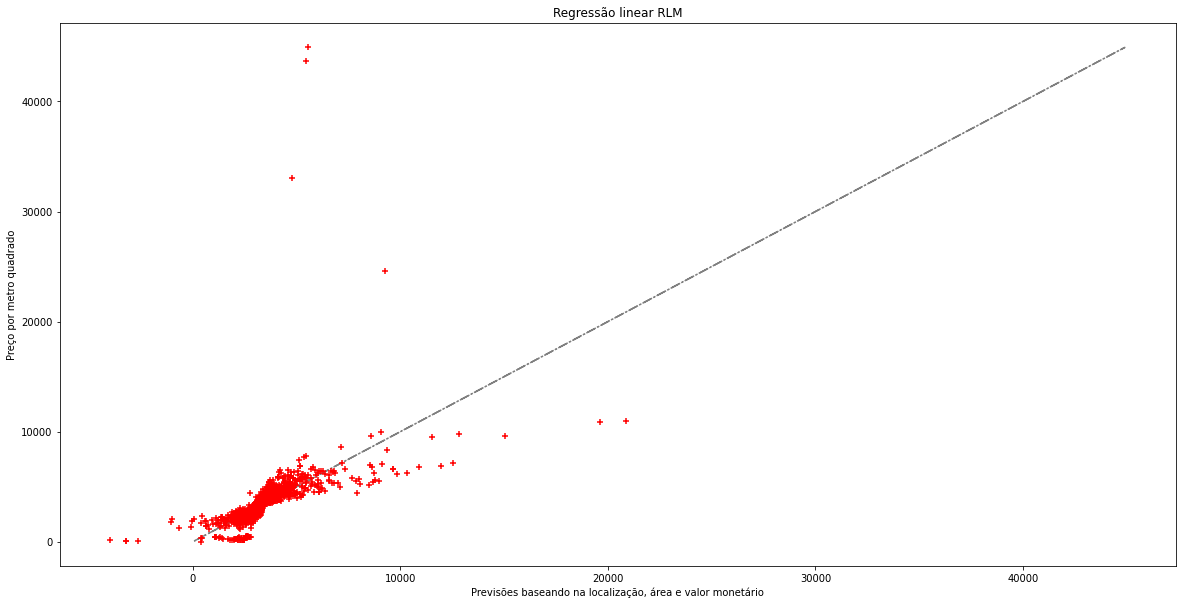

MSE: 2328592.6696936665
RMSE: 1525.9726962477625
MAE: 480.1617204762471
R2: 0.32645734005371185
                    Robust linear Model Regression Results                    
Dep. Variable:            preco_metro   No. Observations:                 2270
Model:                            RLM   Df Residuals:                     2265
Method:                          IRLS   Df Model:                            4
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Fri, 01 Jul 2022                                         
Time:                        17:08:34                                         
No. Iterations:                    25                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
--------------------

In [861]:
generate_regression_rlm(['lat', 'lon', 'surface_total_in_m2_Final', 'price_usd'],["preco_metro"],"Previsões baseando na localização, área e valor monetário", "Preço por metro quadrado")

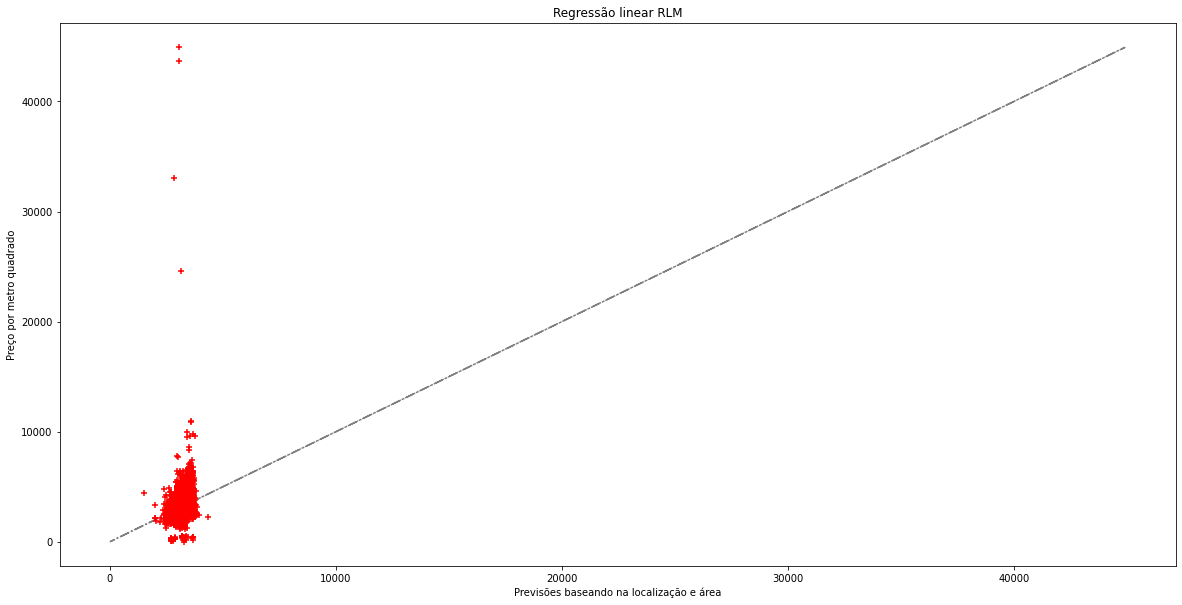

MSE: 3328689.9454184184
RMSE: 1824.469771034428
MAE: 837.0474537491986
R2: 0.03718039262378592
                    Robust linear Model Regression Results                    
Dep. Variable:            preco_metro   No. Observations:                 2270
Model:                            RLM   Df Residuals:                     2266
Method:                          IRLS   Df Model:                            3
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Fri, 01 Jul 2022                                         
Time:                        17:08:34                                         
No. Iterations:                    14                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------

In [862]:
generate_regression_rlm(['lat', 'lon', 'surface_total_in_m2_Final'],["preco_metro"],"Previsões baseando na localização e área", "Preço por metro quadrado")

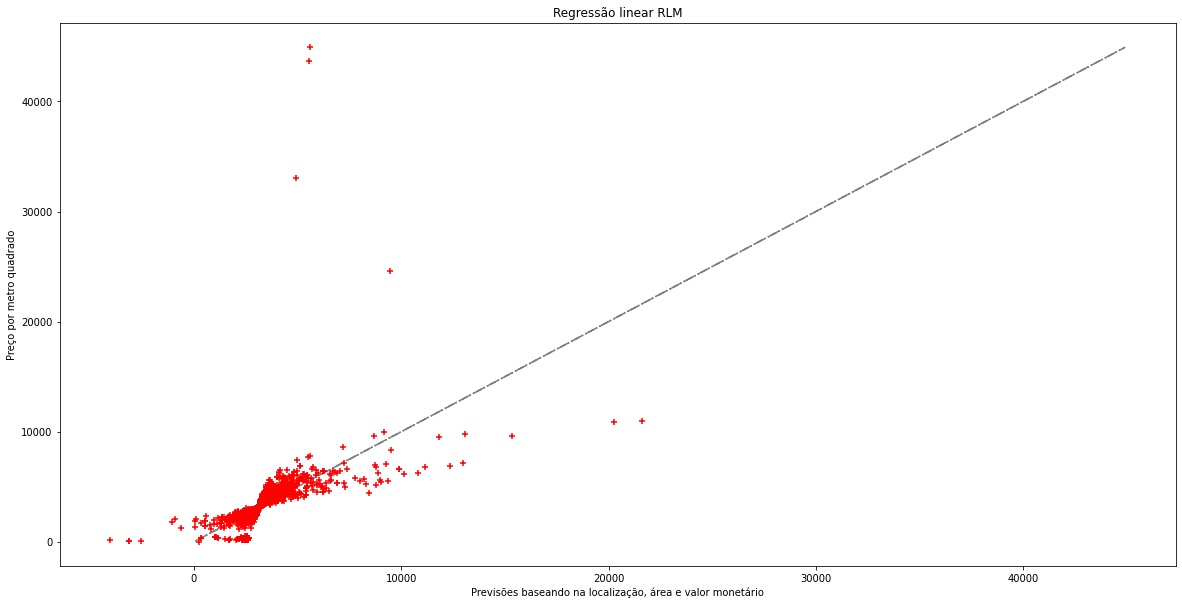

MSE: 2364620.1947187306
RMSE: 1537.7321596164693
MAE: 488.6272895206888
R2: 0.316036421293431
                    Robust linear Model Regression Results                    
Dep. Variable:            preco_metro   No. Observations:                 2270
Model:                            RLM   Df Residuals:                     2267
Method:                          IRLS   Df Model:                            2
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Fri, 01 Jul 2022                                         
Time:                        17:08:35                                         
No. Iterations:                    30                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
----------------------

In [863]:
generate_regression_rlm(['surface_total_in_m2_Final', 'price_usd'],["preco_metro"],"Previsões baseando na localização, área e valor monetário", "Preço por metro quadrado")

<h5>8.3.2. Regressão por preço em dólar</h5>

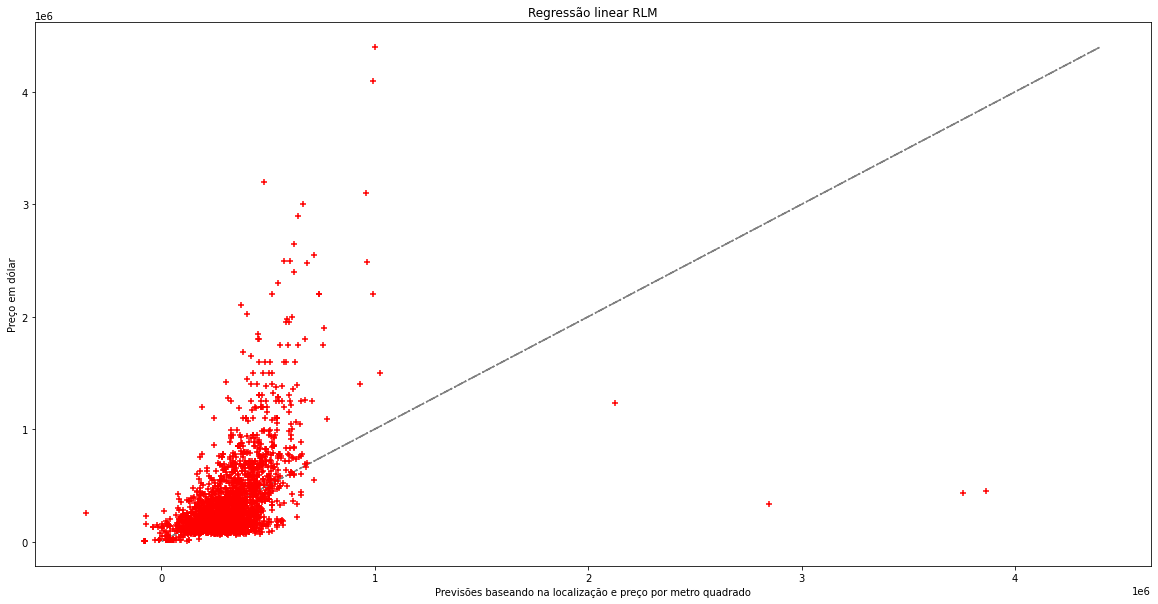

MSE: 109294658716.9381
RMSE: 330597.4269666025
MAE: 180373.30571120456
R2: 0.21297125995104582
                    Robust linear Model Regression Results                    
Dep. Variable:              price_usd   No. Observations:                 2270
Model:                            RLM   Df Residuals:                     2266
Method:                          IRLS   Df Model:                            3
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Fri, 01 Jul 2022                                         
Time:                        17:08:35                                         
No. Iterations:                     4                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------

In [864]:
generate_regression_rlm(['lat', 'lon', 'preco_metro'],["price_usd"],"Previsões baseando na localização e preço por metro quadrado", "Preço em dólar")

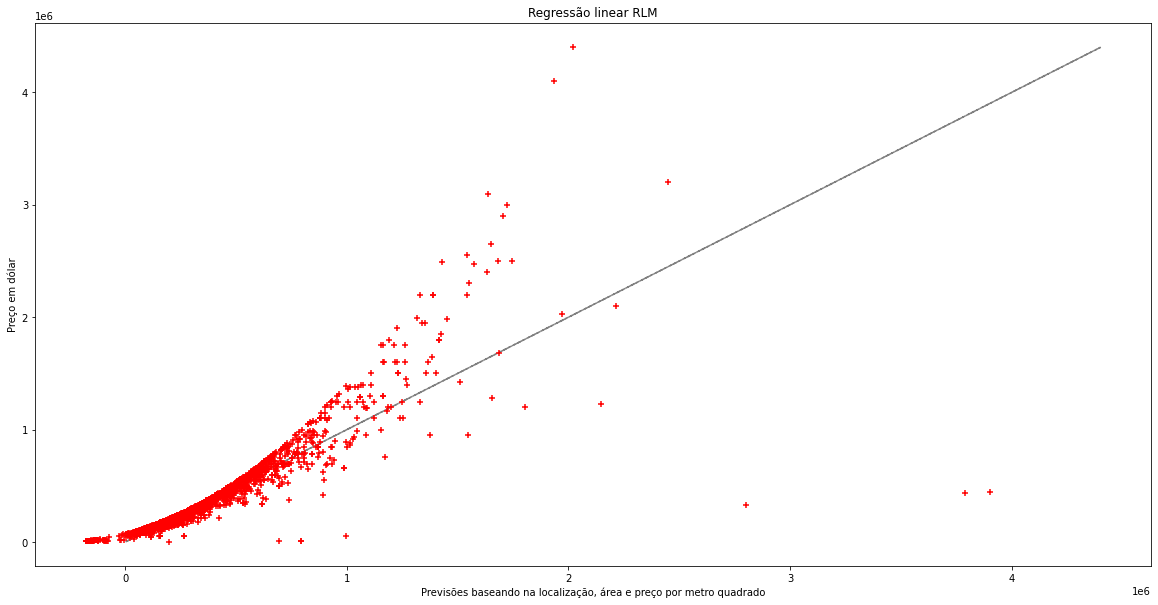

MSE: 32696425458.386383
RMSE: 180821.5292999879
MAE: 58583.18881339241
R2: 0.764553667720723
                    Robust linear Model Regression Results                    
Dep. Variable:              price_usd   No. Observations:                 2270
Model:                            RLM   Df Residuals:                     2265
Method:                          IRLS   Df Model:                            4
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Fri, 01 Jul 2022                                         
Time:                        17:08:35                                         
No. Iterations:                    12                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
-----------------------

In [865]:
generate_regression_rlm(['lat', 'lon', 'surface_total_in_m2_Final', 'preco_metro'],["price_usd"],"Previsões baseando na localização, área e preço por metro quadrado", "Preço em dólar")

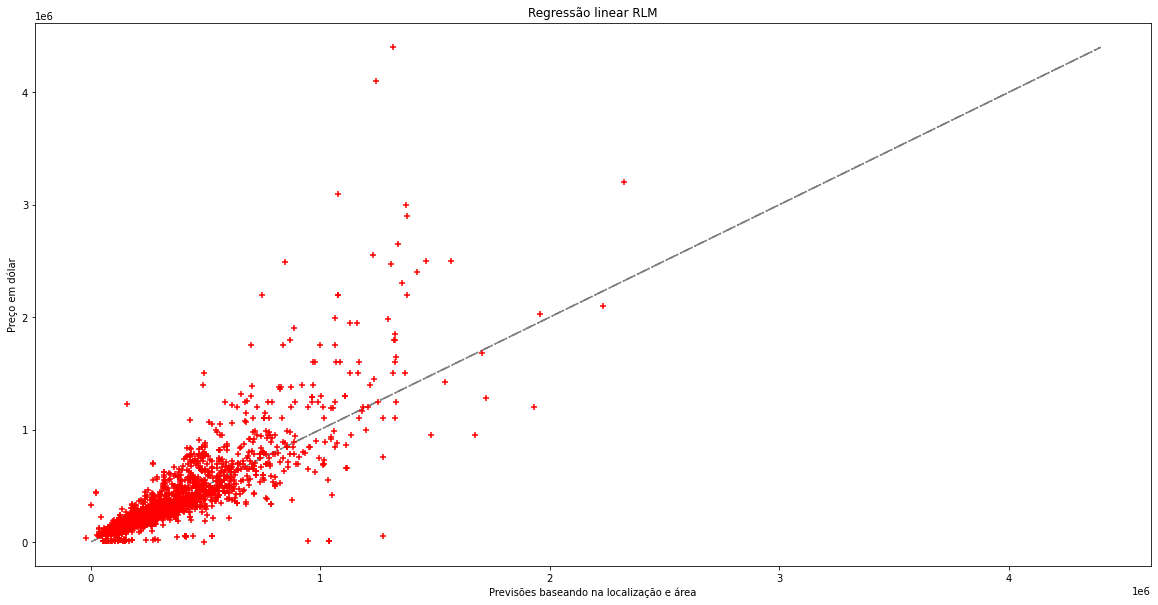

MSE: 43129830678.02365
RMSE: 207677.22715315624
MAE: 98385.11806853395
R2: 0.6894229169518501
                    Robust linear Model Regression Results                    
Dep. Variable:              price_usd   No. Observations:                 2270
Model:                            RLM   Df Residuals:                     2266
Method:                          IRLS   Df Model:                            3
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Fri, 01 Jul 2022                                         
Time:                        17:08:35                                         
No. Iterations:                     7                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
----------------------

In [866]:
generate_regression_rlm(['lat', 'lon', 'surface_total_in_m2_Final'],["price_usd"],"Previsões baseando na localização e área", "Preço em dólar")

<h4>8.4. Regressão Decision Tree Regressor</h4>

<span>Apesar de não ser um modelo linear é uma otima implementação, pois outlier ou valores nulos não são prejudiciais. E também é um algoritmo que lida bem com dados nominais.</span>

In [867]:
def chart_dtr(y, predictions, column_names):
    names = ', '.join(column_names.values)

    plt.plot(y, 
         y, 
         '-.', 
         c = 'grey'
        )
    
    plt.scatter(predictions, 
            y, 
            s = 50, 
            c = 'r', 
            marker = '+', 
            zorder = 10
           )   
    
    plt.title(f"Previsões baseando em {names}")
    plt.xlabel(f"Previsões")
    plt.ylabel("Preço por metro quatrado")
    plt.show()

In [868]:
def generate_train_test(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle = False)
    return X_train, X_test, y_train, y_test

In [869]:
def info_dtr(tree_model,X_dtr_test, y_dtr_test, y_dtr_pred):
    print ('R2_train:', tree_model.score(X_dtr_test, y_dtr_test))
    print ("MSE:", metrics.mean_squared_error(y_dtr_test, y_dtr_pred))
    print ("RMSE:",np.sqrt(metrics.mean_squared_error(y_dtr_test, y_dtr_pred)) )
    print ('MAE:', metrics.mean_absolute_error(y_dtr_test, y_dtr_pred))
    print ('R2:', metrics.r2_score(y_dtr_test, y_dtr_pred))

In [870]:
def generate_regression_dtr(variaveis):
    X_dtr = dfApartament[variaveis]
    scaler_dtr = StandardScaler()
    data_scaled_dtr = scaler_dtr.fit_transform(X_dtr)
    X_dtr_scaled = pd.DataFrame(data_scaled_dtr, columns=X_dtr.columns)

    y_dtr = dfApartament["preco_metro"]

    X_dtr_train, X_dtr_test, y_dtr_train, y_dtr_test = generate_train_test(X_dtr_scaled, y_dtr)

    tree_model = DecisionTreeRegressor(random_state=42)
    tree_model.fit(X_dtr_train, y_dtr_train)

    y_dtr_pred = tree_model.predict(X_dtr_test)

    info_dtr(tree_model,X_dtr_test, y_dtr_test, y_dtr_pred)
    chart_dtr(y_dtr_test, y_dtr_pred, X_dtr_test.columns)

R2_train: 0.917371498571584
MSE: 86362.1242136083
RMSE: 293.8743340504718
MAE: 160.44364939049578
R2: 0.917371498571584


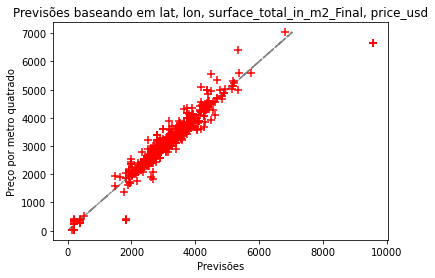

In [871]:
generate_regression_dtr(['lat', 'lon','surface_total_in_m2_Final','price_usd'])

R2_train: 0.9115653055118074
MSE: 92430.67389765437
RMSE: 304.024133742133
MAE: 129.29836901480232
R2: 0.9115653055118074


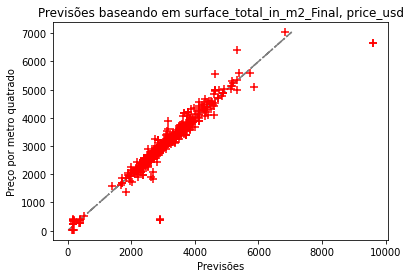

In [872]:
generate_regression_dtr(['surface_total_in_m2_Final','price_usd'])